In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
def PlotingScore_profile(ASD, Cont, title="", method = "ratio"):
    fig, ax = plt.subplots(dpi=480)
    if method == "ratio":
        xx = ASD/Cont
        mean = xx.mean(axis=0)
        lower = np.percentile(xx, 25, axis=0)
        upper = np.percentile(xx, 75, axis=0)
        ax.errorbar(topNs, mean, color="red", marker="o", markersize=3, lw=0.1,
                    yerr=(mean - lower, upper - mean ), ls="dashed", label="ASD/Sib")
    elif method == "zscore":
        xx = (ASD - Cont.mean(axis=0))/Cont.std(axis=0)
        ax.plot(topNs, xx, color="red", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")
    elif method == "diff":
        #xx = np.exp2(ASD - Cont.mean(axis=0))
        xx = ASD - Cont.mean(axis=0)
        ax.plot(topNs, xx, color="blue", marker="o", markersize=3, lw=0.1,
                     ls="dashed", label="ASD to Sib Zscore")
        #ax.plot(topNs, xx/((topNs)*topNs), color="red", marker="o", markersize=3, lw=0.1,
        #             ls="dashed", label="ASD to Sib Zscore")
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel("top N sturctures (by expression bias)")
    ax.set_ylabel("Score ratio")
    plt.legend()
    #ax.set_xlim(1,100)
    
def Plot_LogP(Cases, Conts):
    Zscores = []
    Pvalues = []
    for case, cont in zip(Cases, Conts):
        Z, P = GetPermutationP(cont, case)
        Zscores.append(Z)
        Pvalues.append(P)
    return Zscores, Pvalues

In [4]:
adj_mat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.csv", index_col=0)
adj_matShort = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.Short.3900.csv", index_col=0)
adj_matLong = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.Long.3900.csv", index_col=0)
InfoMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.csv", index_col=0)
InfoMatShort = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Short.3900.csv", index_col=0)
InfoMatLong = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Long.3900.csv", index_col=0)

In [5]:
topNs = np.arange(200, 5, -1)
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_SI = np.load("{}/RankScores/RankScore.Ipsi.ASD.npy".format(DIR))
Cont_SI = np.load("{}/RankScores/RankScore.Ipsi.Cont.npy".format(DIR))
ASD_SI_Short = np.load("{}/RankScores/RankScore.Ipsi.Short.3900.ASD.npy".format(DIR))
Cont_SI_Short = np.load("{}/RankScores/RankScore.Ipsi.Short.3900.Cont.npy".format(DIR))
ASD_SI_Long = np.load("{}/RankScores/RankScore.Ipsi.Long.3900.ASD.npy".format(DIR))
Cont_SI_Long = np.load("{}/RankScores/RankScore.Ipsi.Long.3900.Cont.npy".format(DIR))

ASD_Conn = np.load("{}/RankScores/RankConn.C.Ipsi.ASD.npy".format(DIR))
Cont_Conn = np.load("{}/RankScores/RankConn.C.Ipsi.Cont.npy".format(DIR))
ASD_Conn_Short = np.load("{}/RankScores/RankConn.C.Ipsi.Short.3900.ASD.npy".format(DIR))
Cont_Conn_Short = np.load("{}/RankScores/RankConn.C.Ipsi.Short.3900.Cont.npy".format(DIR))
ASD_Conn_Long = np.load("{}/RankScores/RankConn.C.Ipsi.Long.3900.ASD.npy".format(DIR))
Cont_Conn_Long = np.load("{}/RankScores/RankConn.C.Ipsi.Long.3900.Cont.npy".format(DIR))

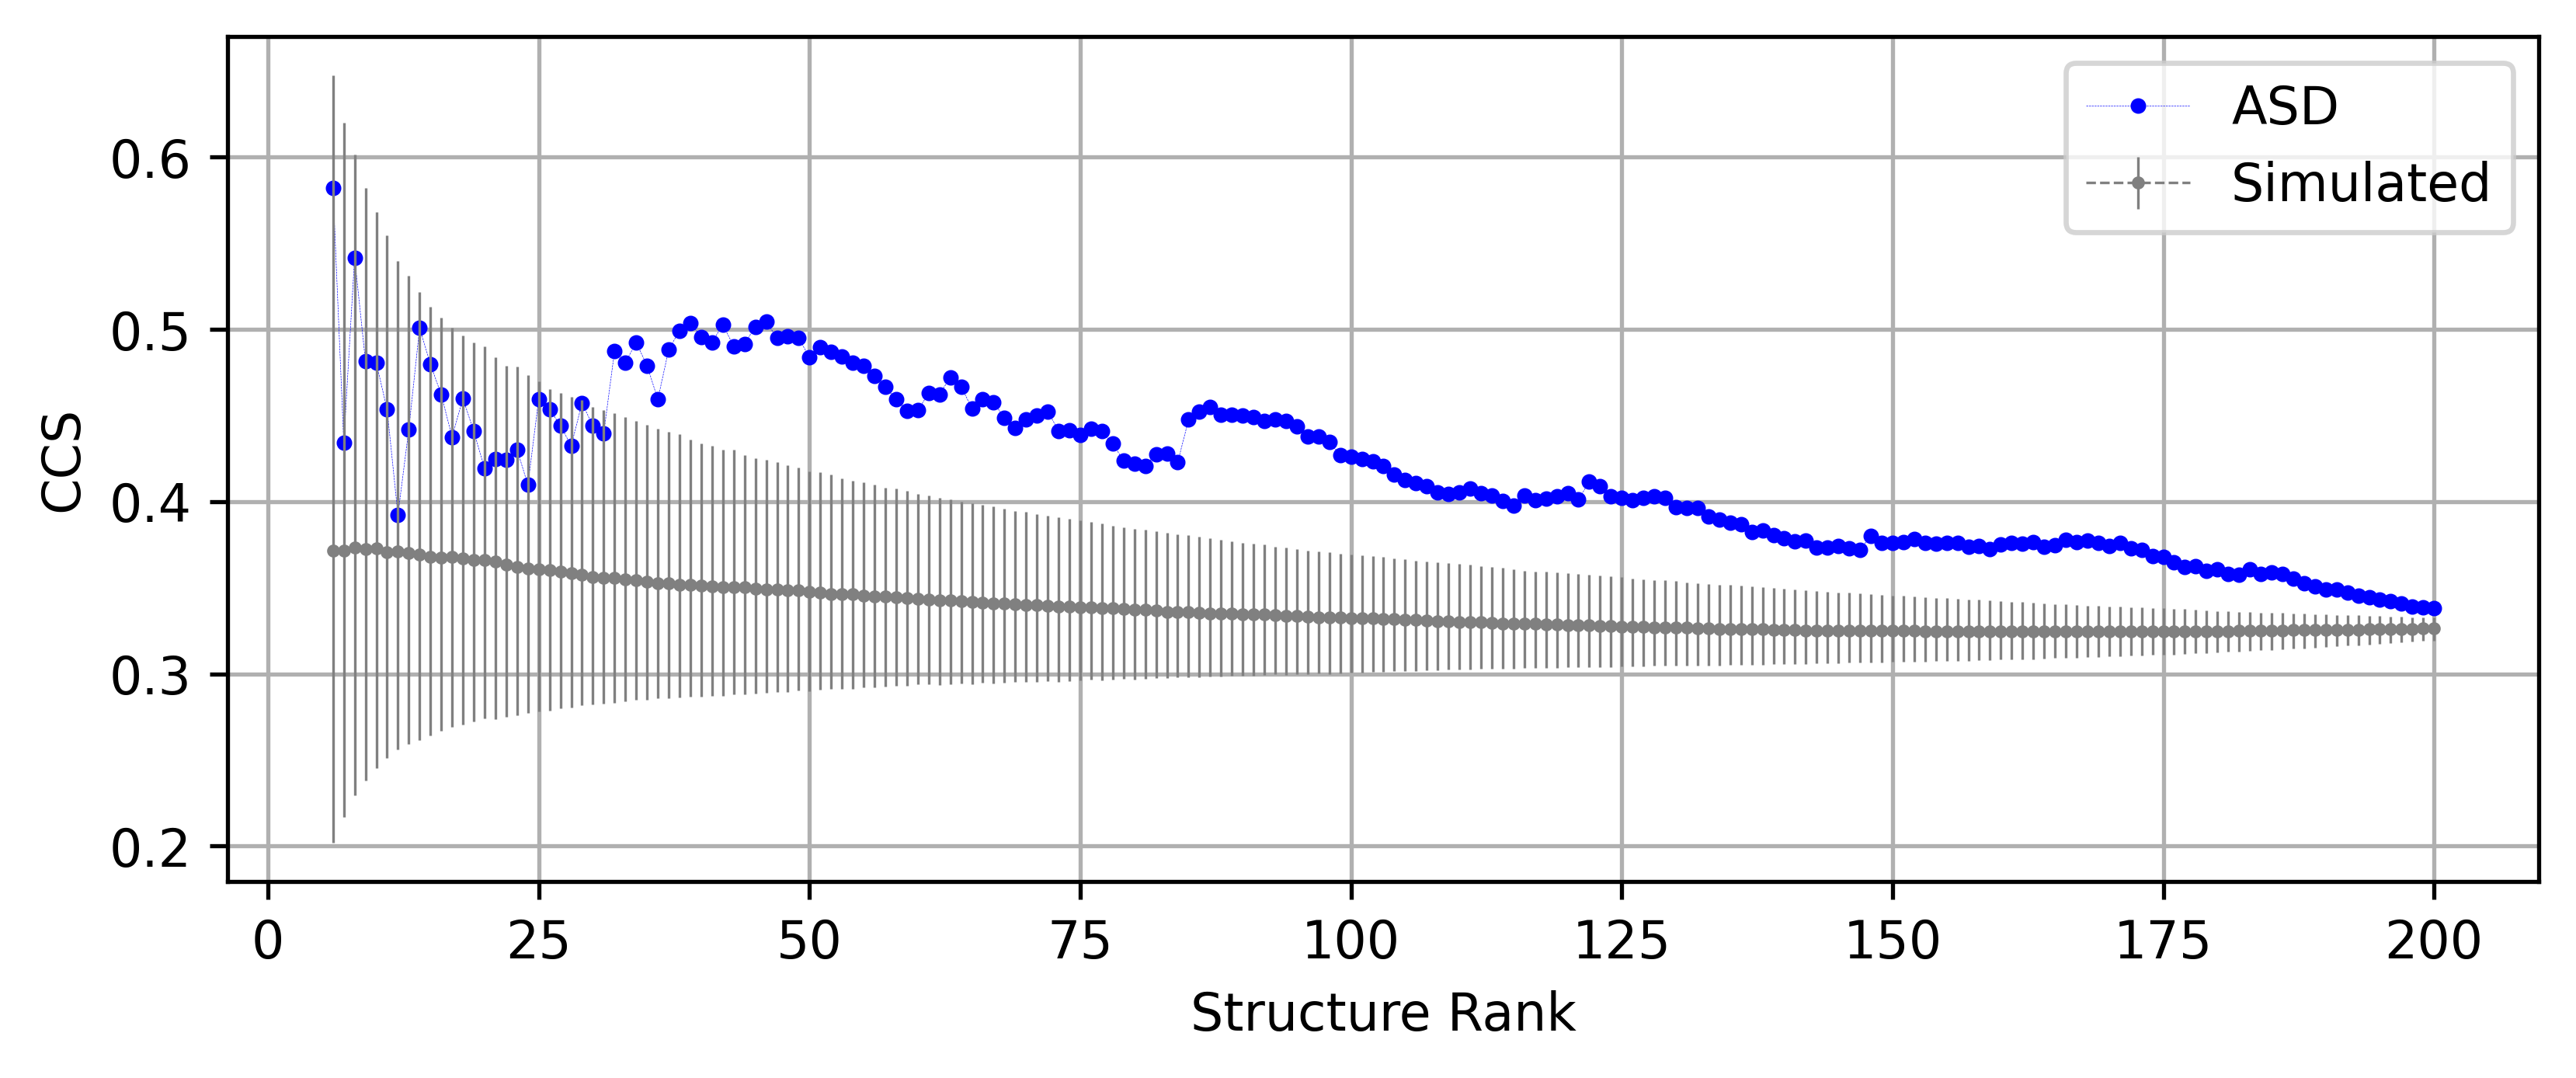

In [6]:
import matplotlib.backends.backend_pdf
#pdf = matplotlib.backends.backend_pdf.PdfPages("../figs/InfoScoreRank.pdf")

fig, ax = plt.subplots(dpi=480, figsize=(8,3))

#cont = Cont_Distance.mean(axis=0)
cont = np.median(Cont_SI, axis=0)
ax.plot(topNs, ASD_SI, color="blue", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="ASD")

lower = np.percentile(Cont_SI, 50-34.1, axis=0)
upper = np.percentile(Cont_SI, 50+34.1, axis=0)
ax.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="Simulated")

#ax.set_title("Connection Info")
ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("CCS")
#ax.set_ylim((0.2, 0.9))
plt.legend()
#pdf.savefig( fig )

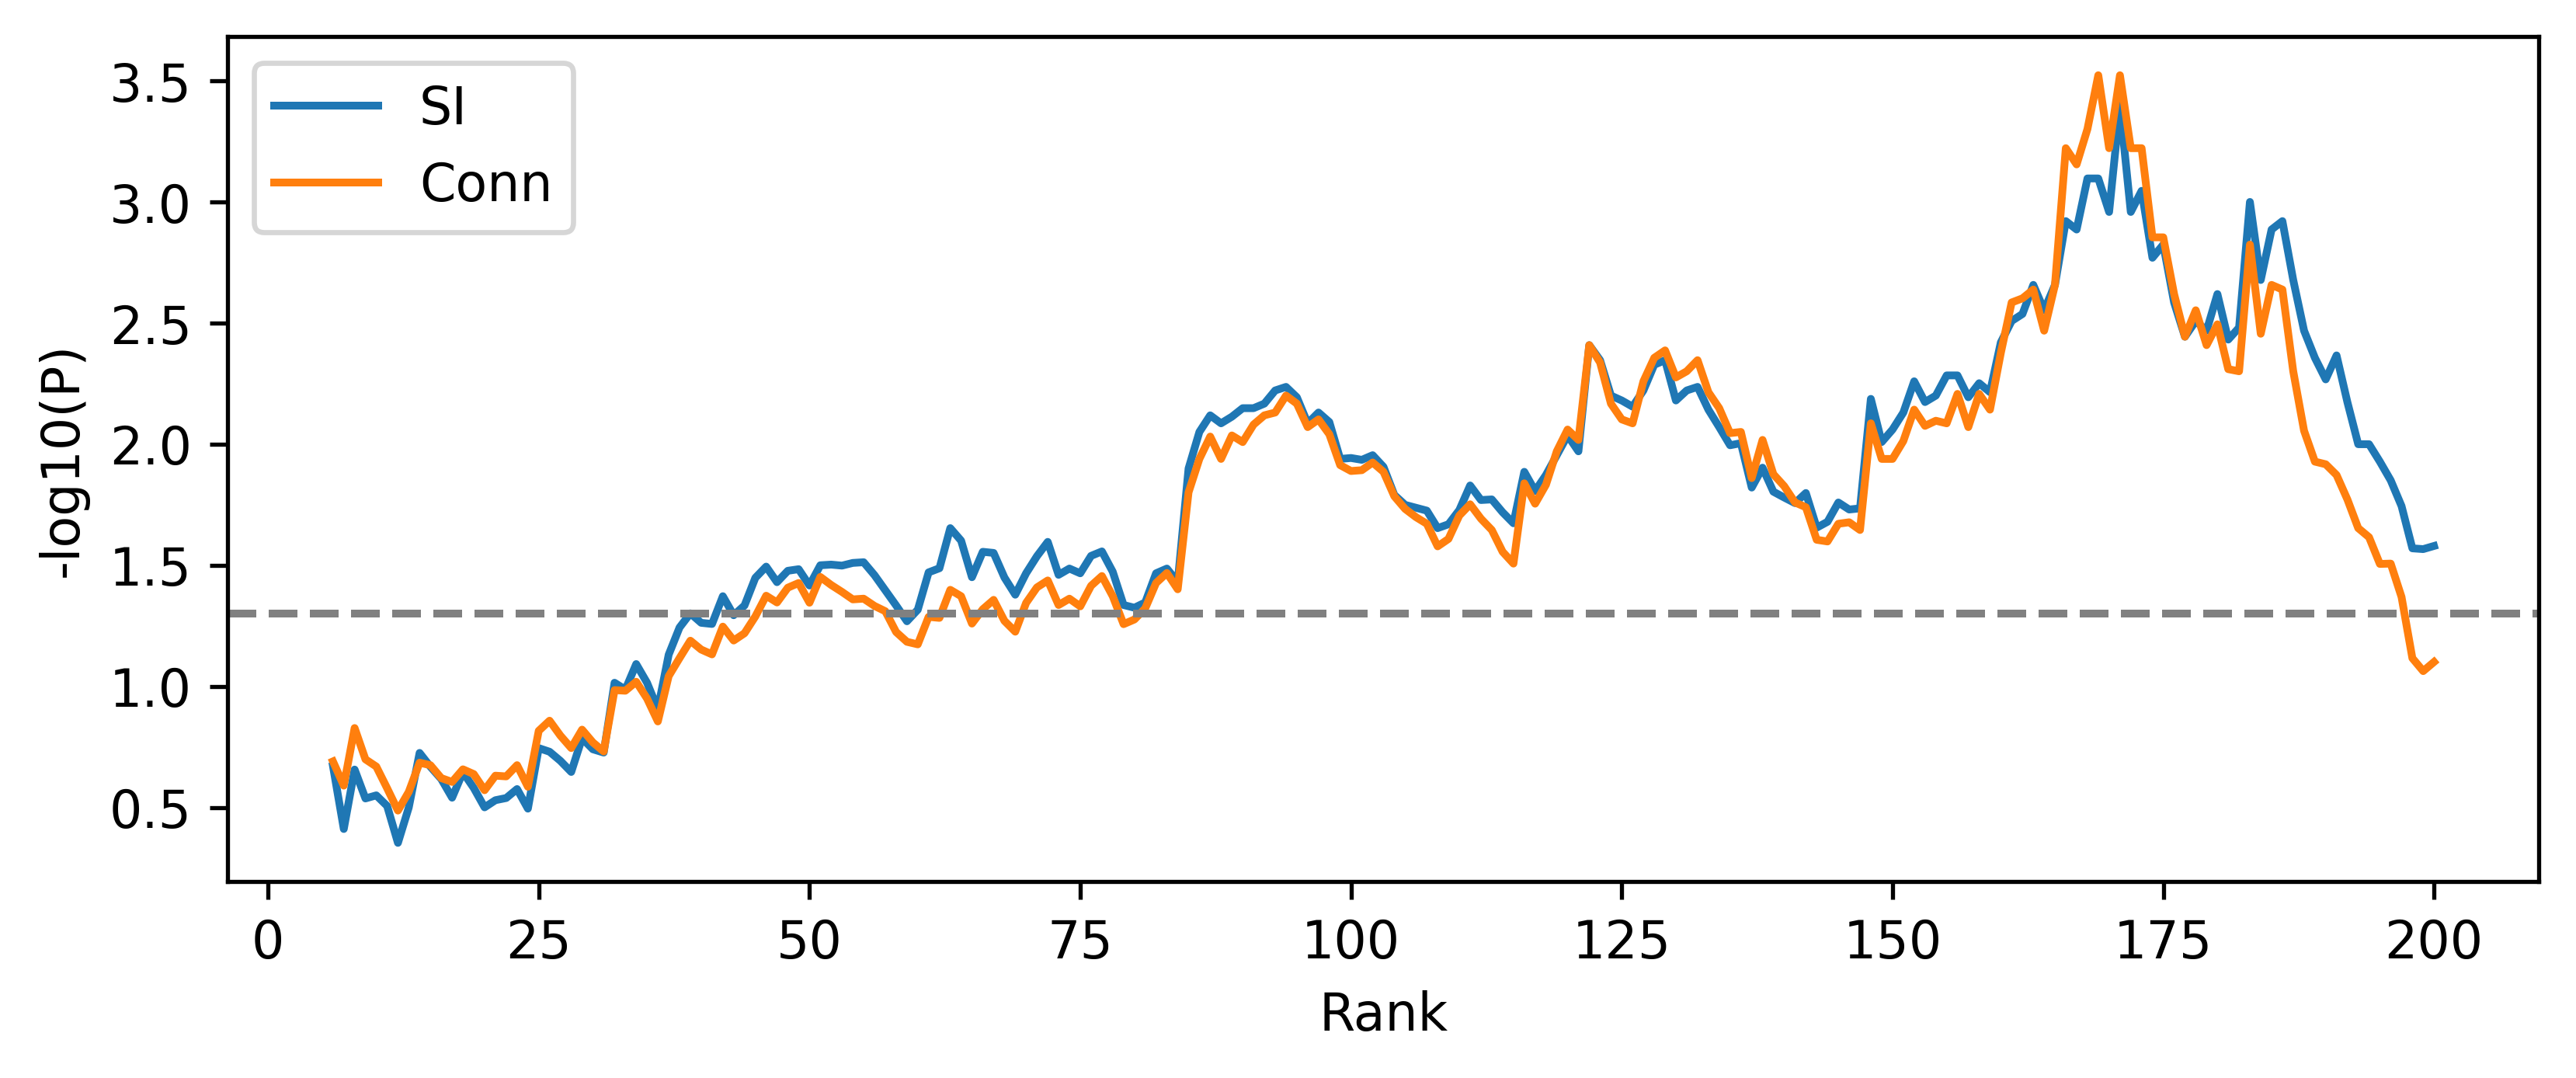

In [7]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
Zscores, Pvalues = Plot_LogP(ASD_SI, Cont_SI.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="SI")

Zscores, Pvalues = Plot_LogP(ASD_Conn, Cont_Conn.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="Conn")

ax.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
ax.set_xlabel("Rank")
ax.set_ylabel("-log10(P)")
#ax.set_xlim(5, 121)
plt.legend()
#ax.plot(topNs, Zscores)

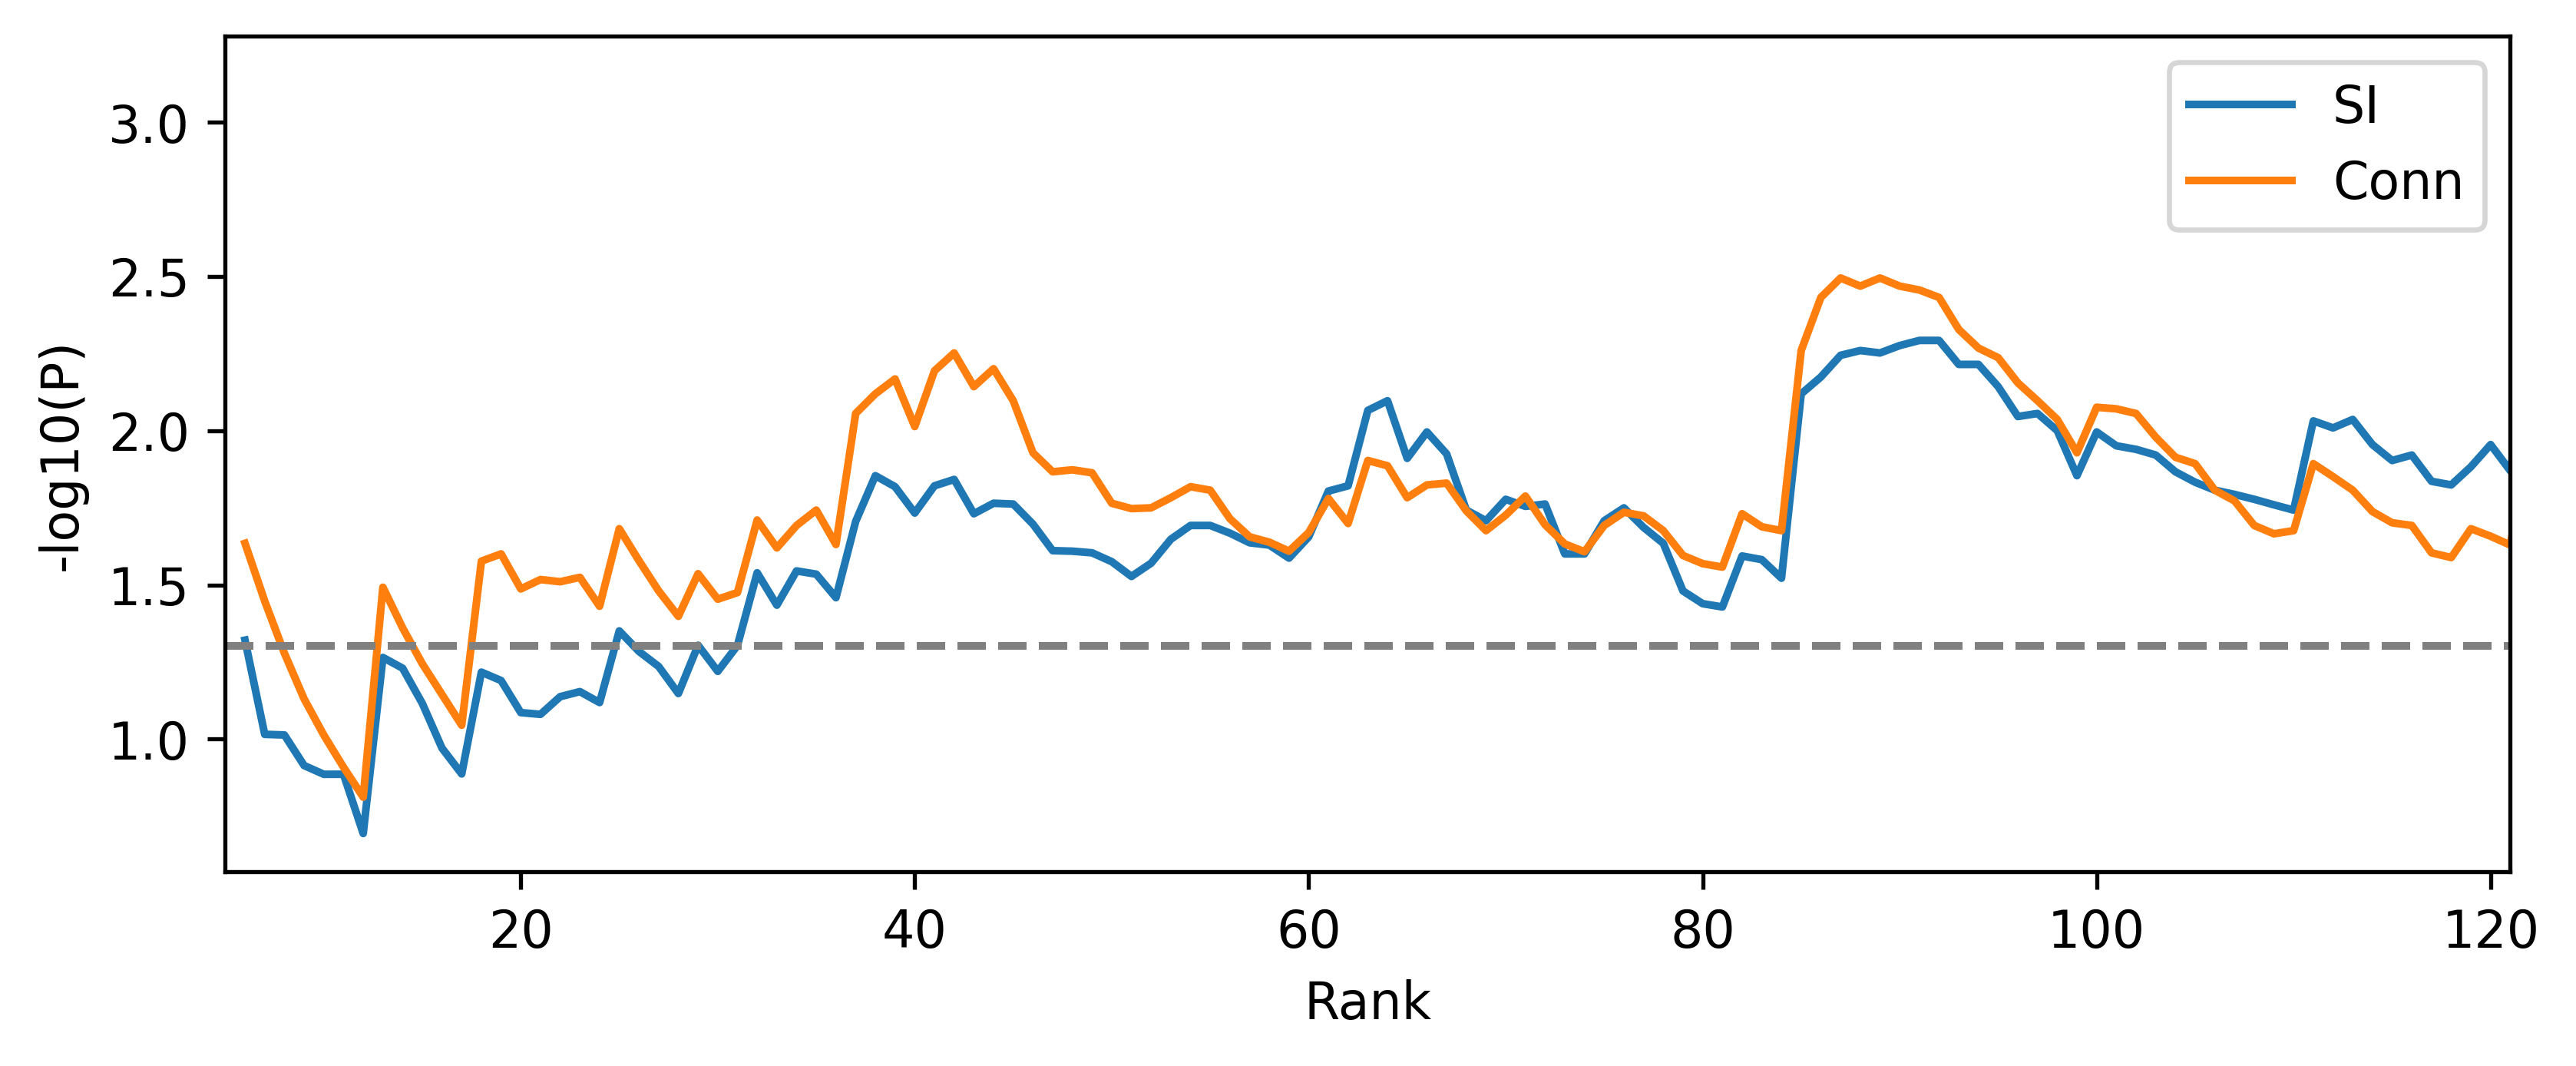

In [8]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
Zscores, Pvalues = Plot_LogP(ASD_SI_Long, Cont_SI_Long.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="SI", )

Zscores, Pvalues = Plot_LogP(ASD_Conn_Long, Cont_Conn_Long.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="Conn")

ax.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
ax.set_xlabel("Rank")
ax.set_ylabel("-log10(P)")
ax.set_xlim(5, 121)
plt.legend()

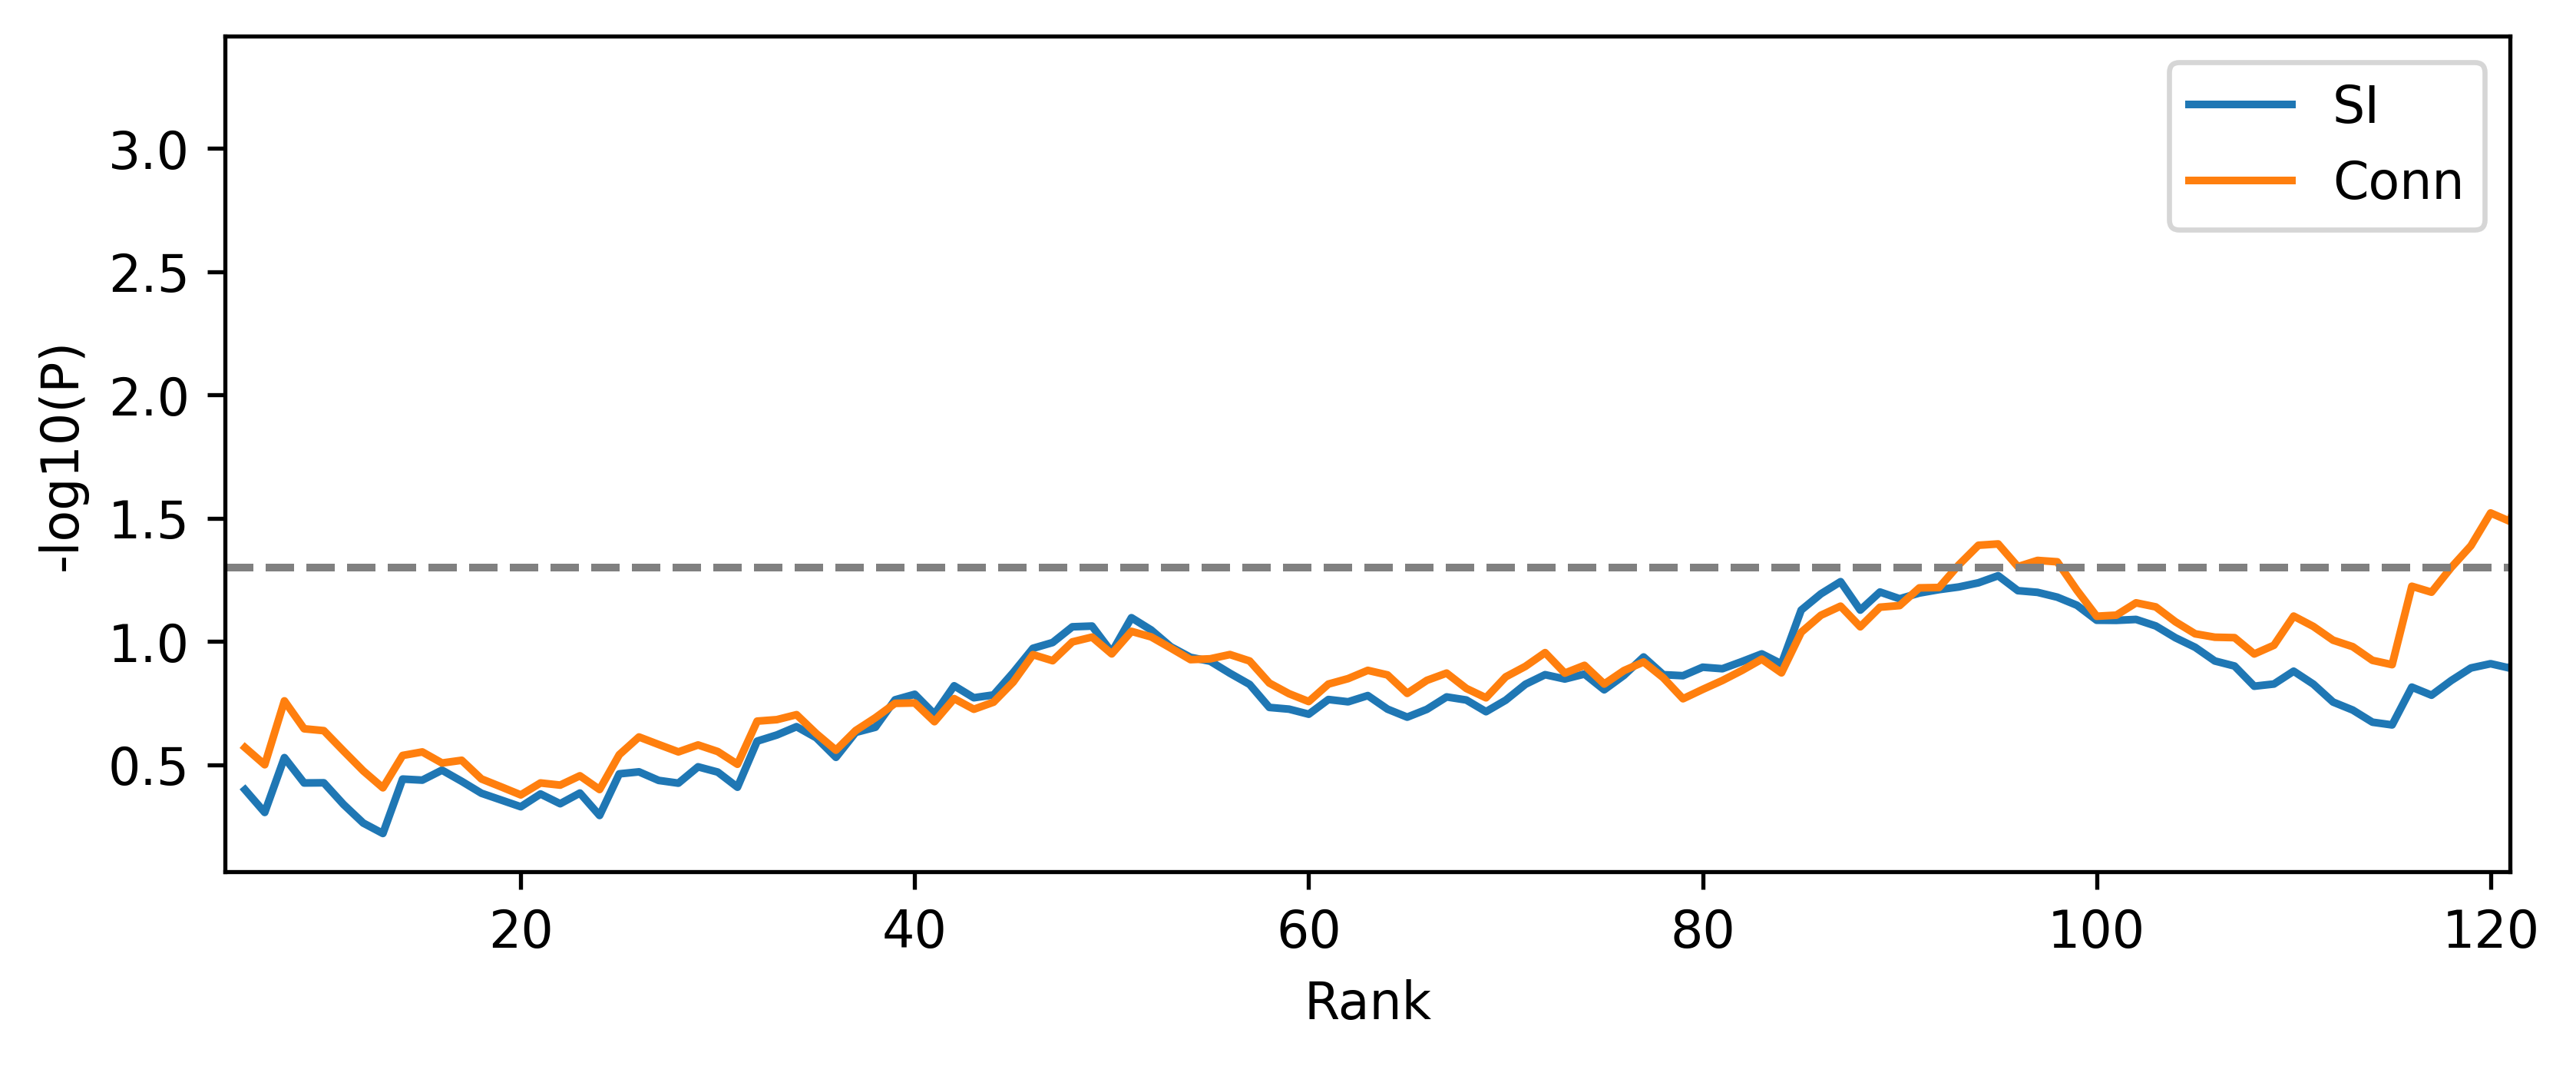

In [9]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
Zscores, Pvalues = Plot_LogP(ASD_SI_Short, Cont_SI_Short.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="SI")

Zscores, Pvalues = Plot_LogP(ASD_Conn_Short, Cont_Conn_Short.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="Conn")

ax.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
ax.set_xlabel("Rank")
ax.set_ylabel("-log10(P)")
ax.set_xlim(5, 121)
plt.legend()

In [10]:
size = 39
idx = np.where(topNs==size)[0][0]
GetPermutationP(Cont_SI[:, idx], (ASD_SI)[idx])

(1.8366634254396836, 0.049895010498950065)

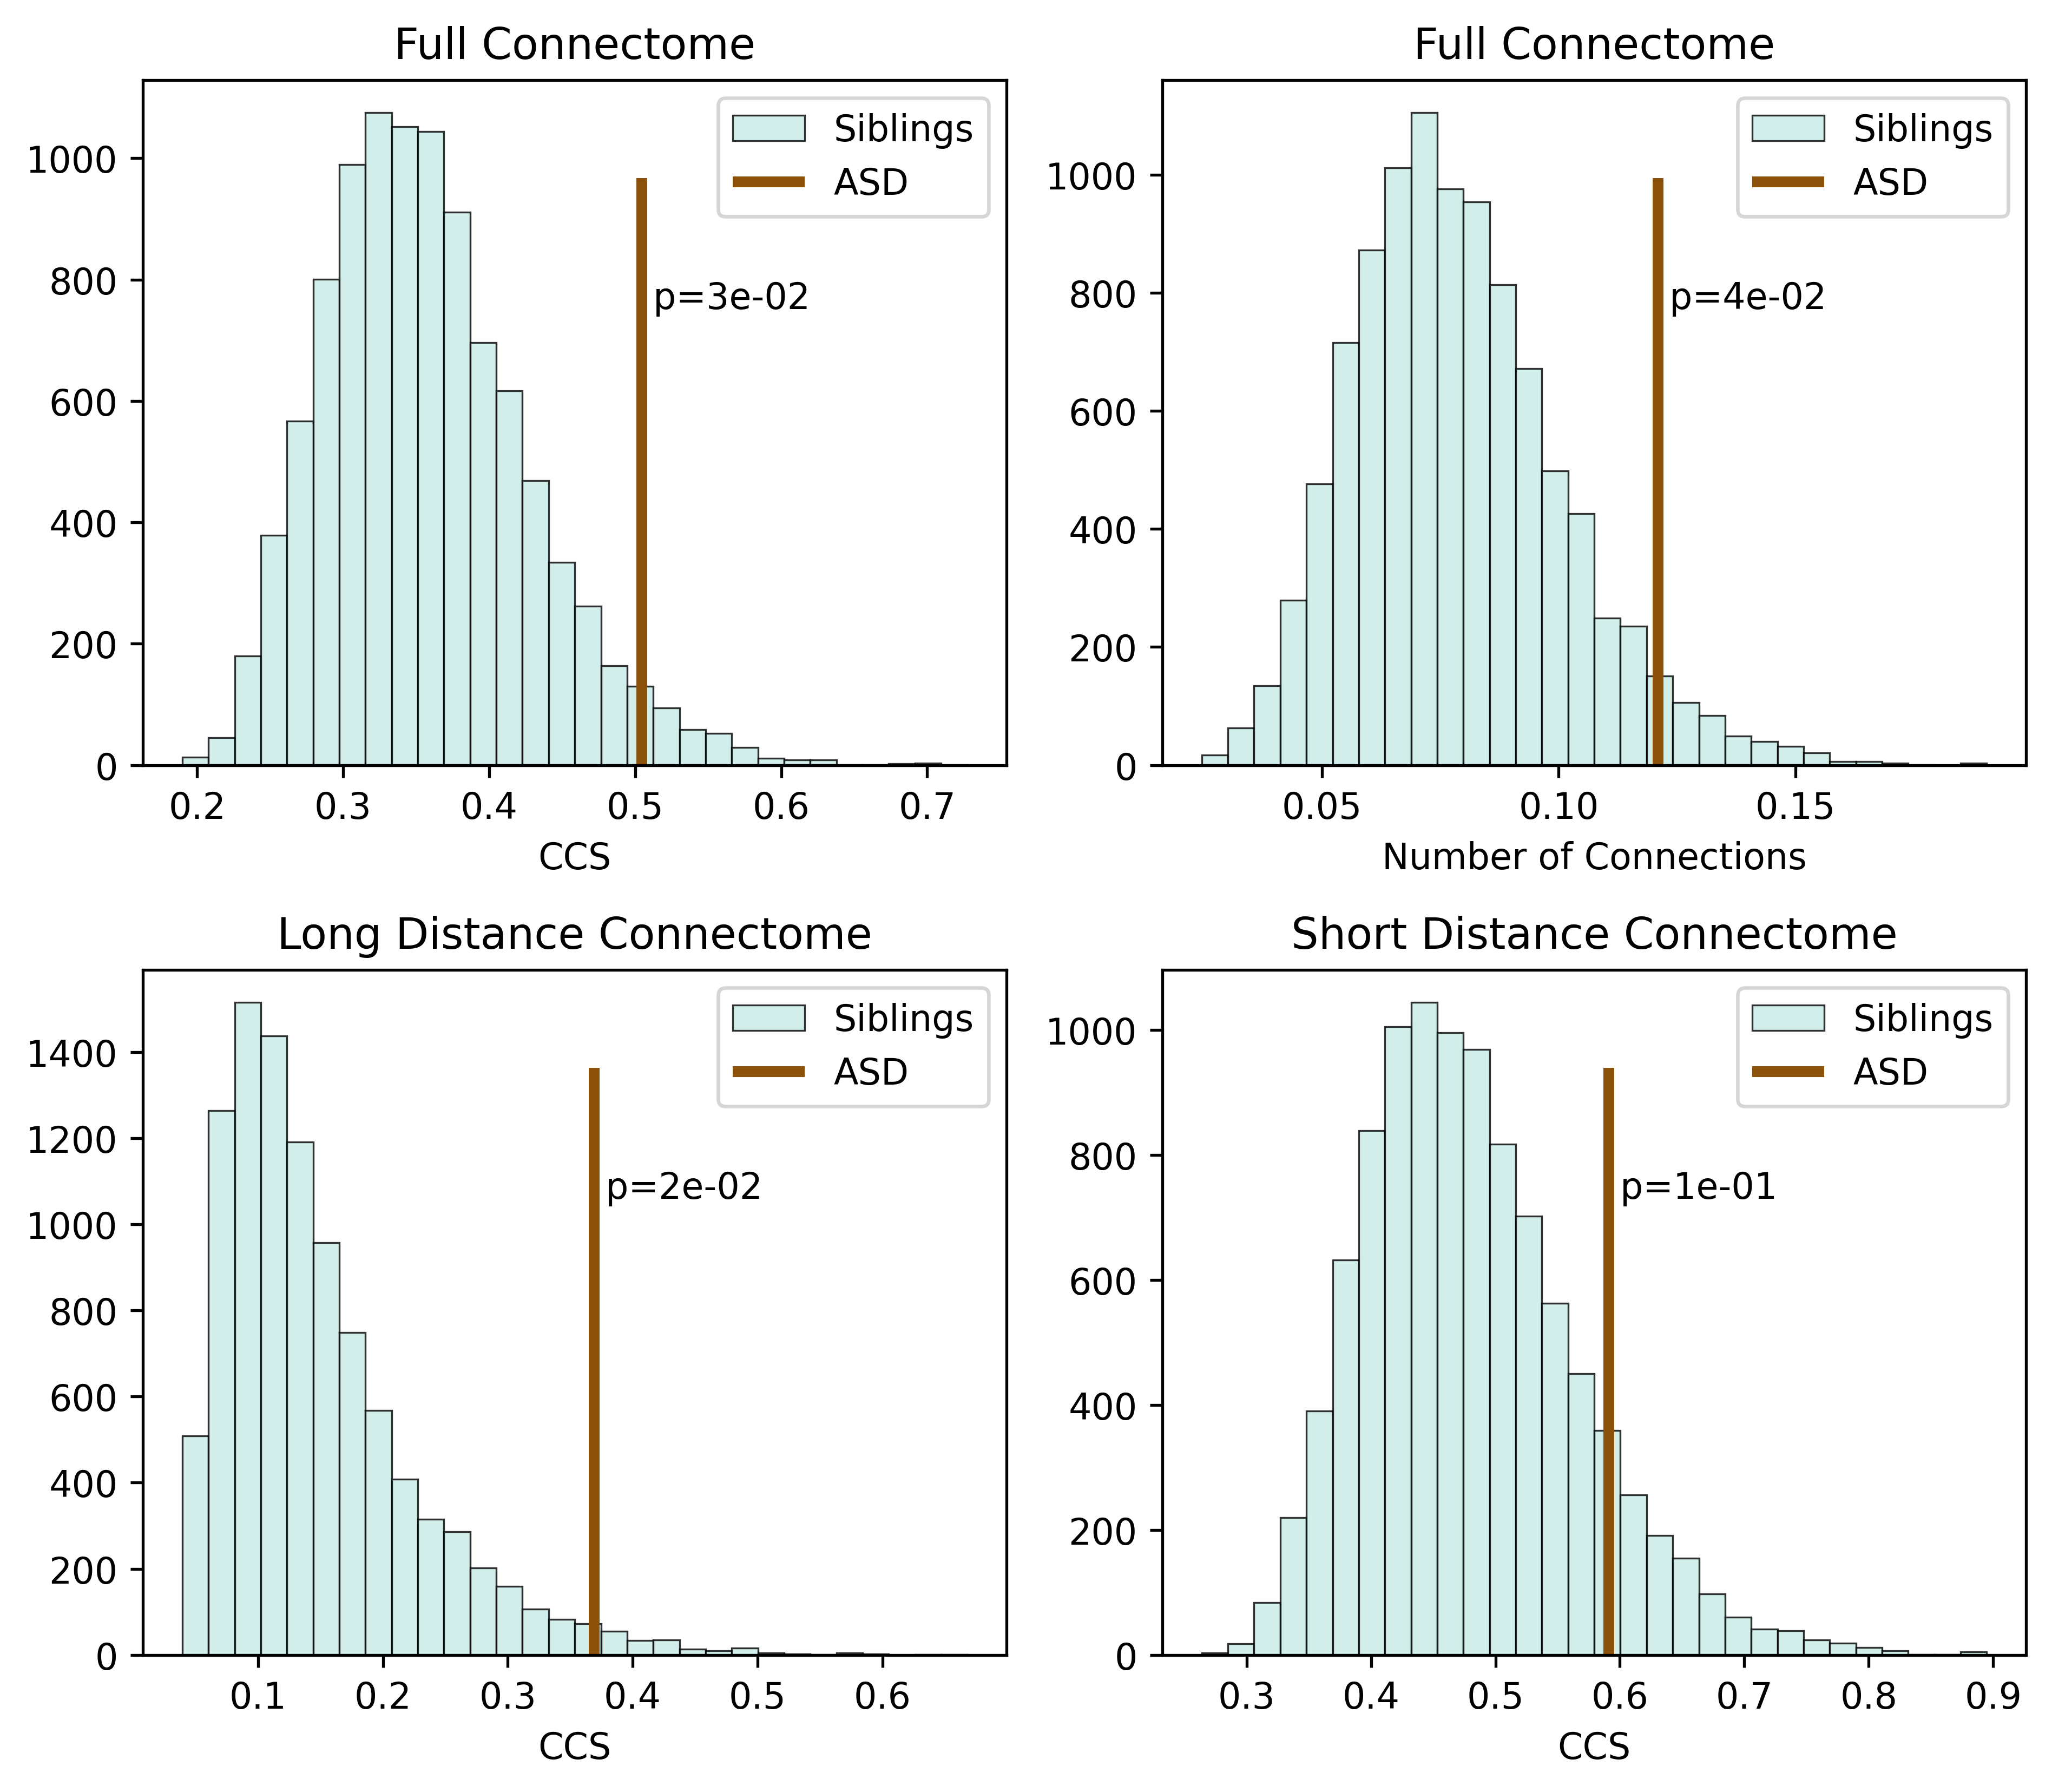

In [11]:
size = 46
idx = np.where(topNs==size)[0][0]
fig, ((ax1, ax2), (ax3, ax4) )= plt.subplots(2,2,dpi=480, figsize=(8,7))
PlotPermutationP(Cont_SI[:, idx], (ASD_SI)[idx], ax1,
                     title="Full Connectome".format(), xlabel="CCS", 
                     dist_label="Siblings", bar_label="ASD")

PlotPermutationP(Cont_Conn[:, idx], (ASD_Conn)[idx], ax2,
                     title="Full Connectome".format(), xlabel="Number of Connections", 
                     dist_label="Siblings", bar_label="ASD")

PlotPermutationP(Cont_SI_Long[:, idx], (ASD_SI_Long)[idx], ax3,
                     title="Long Distance Connectome".format(), xlabel="CCS", 
                     dist_label="Siblings", bar_label="ASD")

PlotPermutationP(Cont_SI_Short[:, idx], (ASD_SI_Short)[idx], ax4,
                     title="Short Distance Connectome".format(), xlabel="CCS", 
                     dist_label="Siblings", bar_label="ASD")
plt.tight_layout()

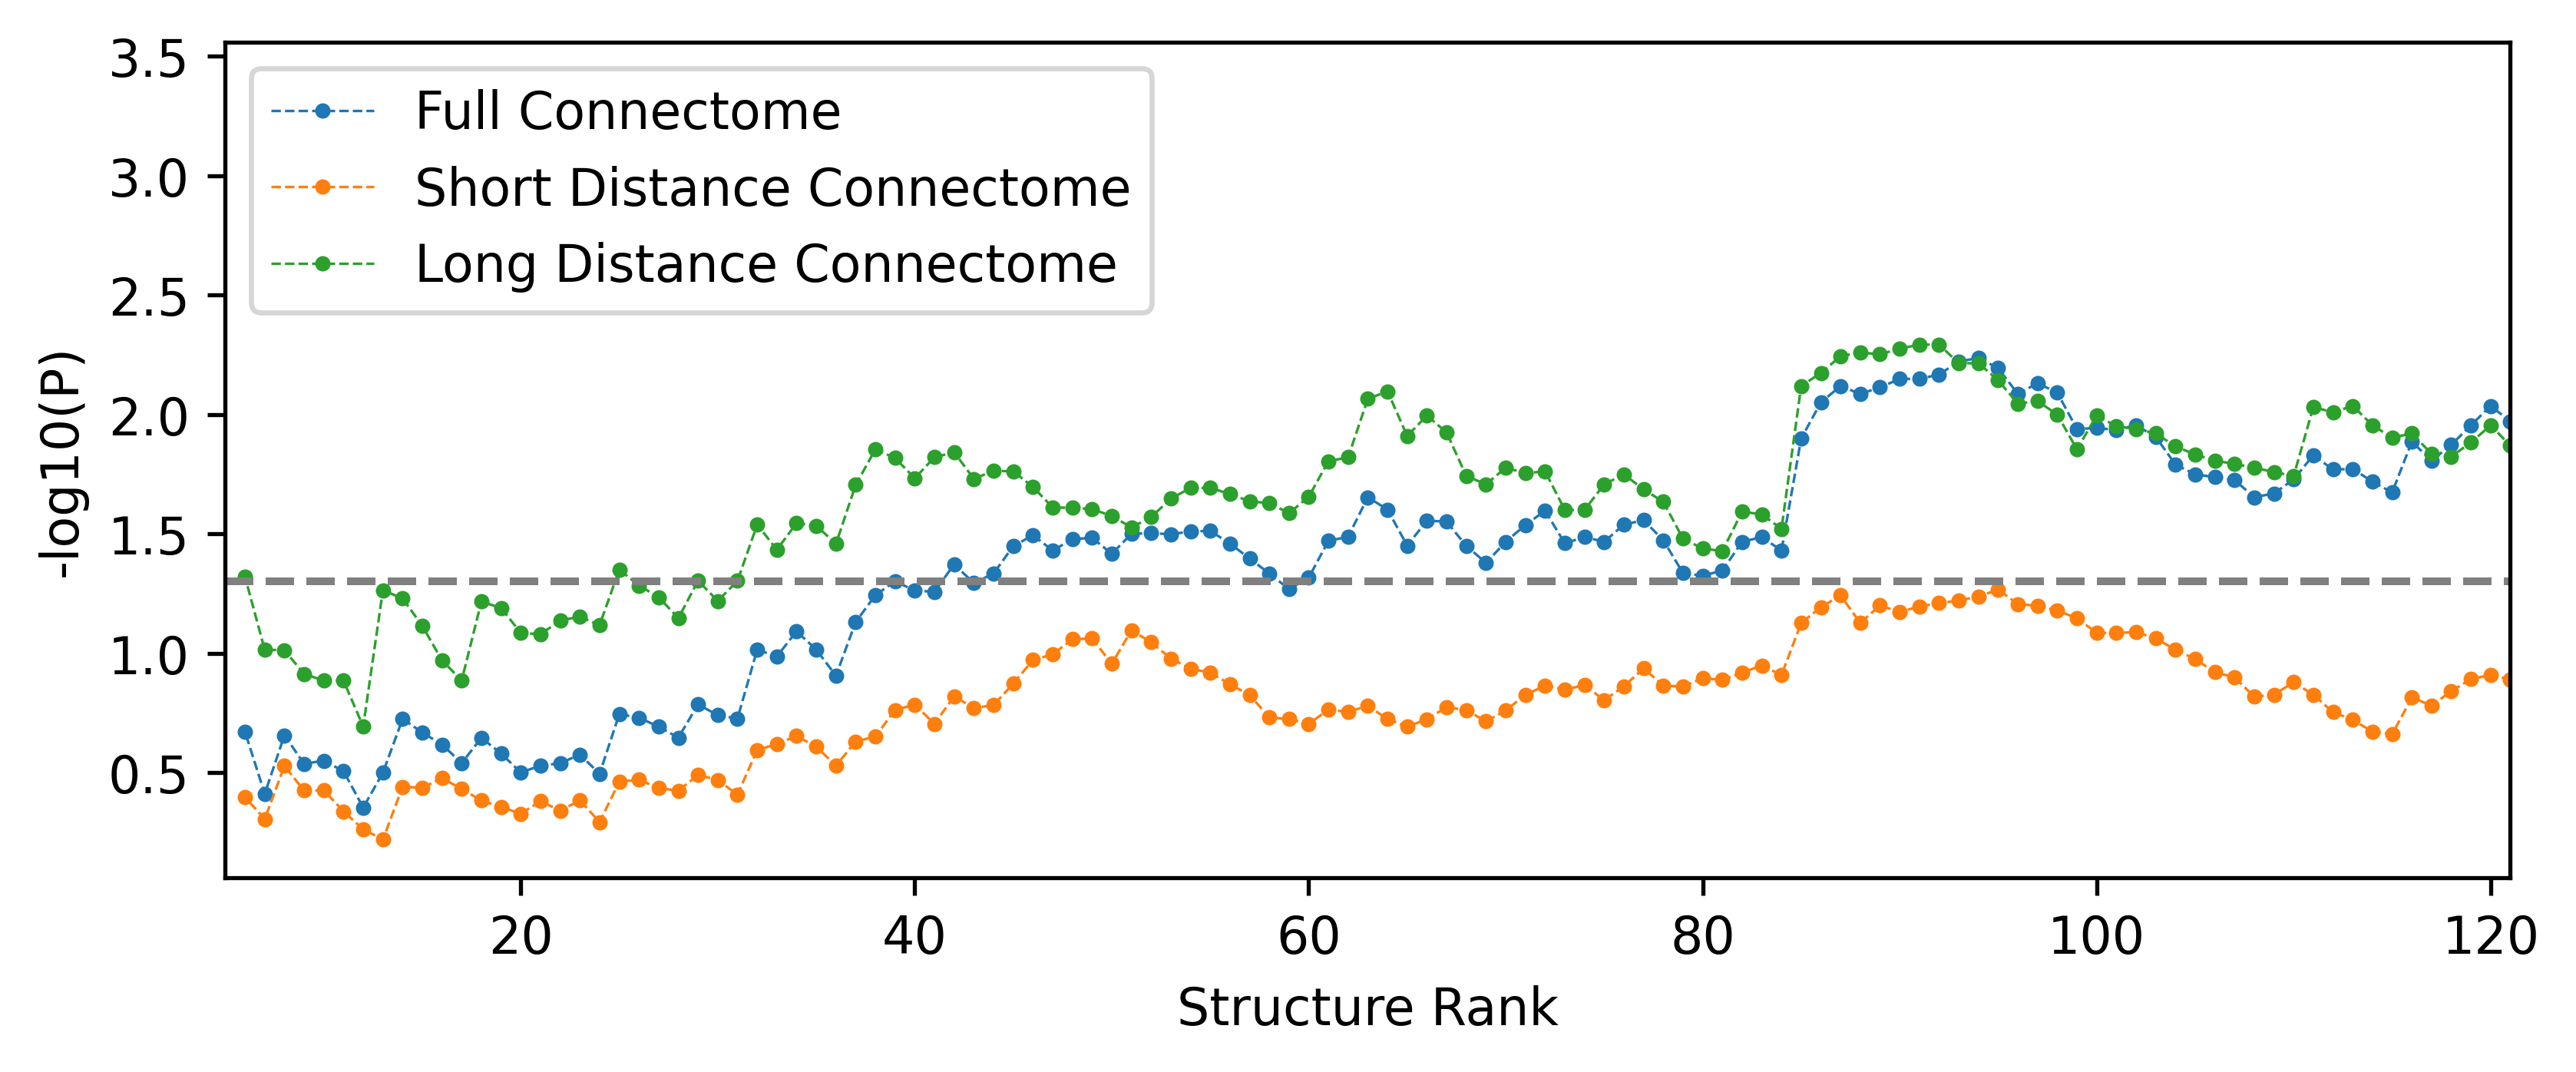

In [12]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
Zscores, Pvalues = Plot_LogP(ASD_SI, Cont_SI.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="Full Connectome", marker="o", markersize=2, lw=0.5,
                     ls="dashed",)

Zscores, Pvalues = Plot_LogP(ASD_SI_Short, Cont_SI_Short.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="Short Distance Connectome", marker="o", markersize=2, lw=0.5,
                     ls="dashed",)


Zscores, Pvalues = Plot_LogP(ASD_SI_Long, Cont_SI_Long.transpose())
ax.plot(topNs, -np.log10(Pvalues), label="Long Distance Connectome", marker="o", markersize=2, lw=0.5,
                     ls="dashed",)

ax.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
ax.set_xlabel("Structure Rank")
ax.set_ylabel("-log10(P)")
ax.set_xlim(5, 121)
plt.legend(loc="upper left")

<AxesSubplot: title={'center': 'Info Per Edge InConnde Circuit'}, xlabel='Normed Score'>

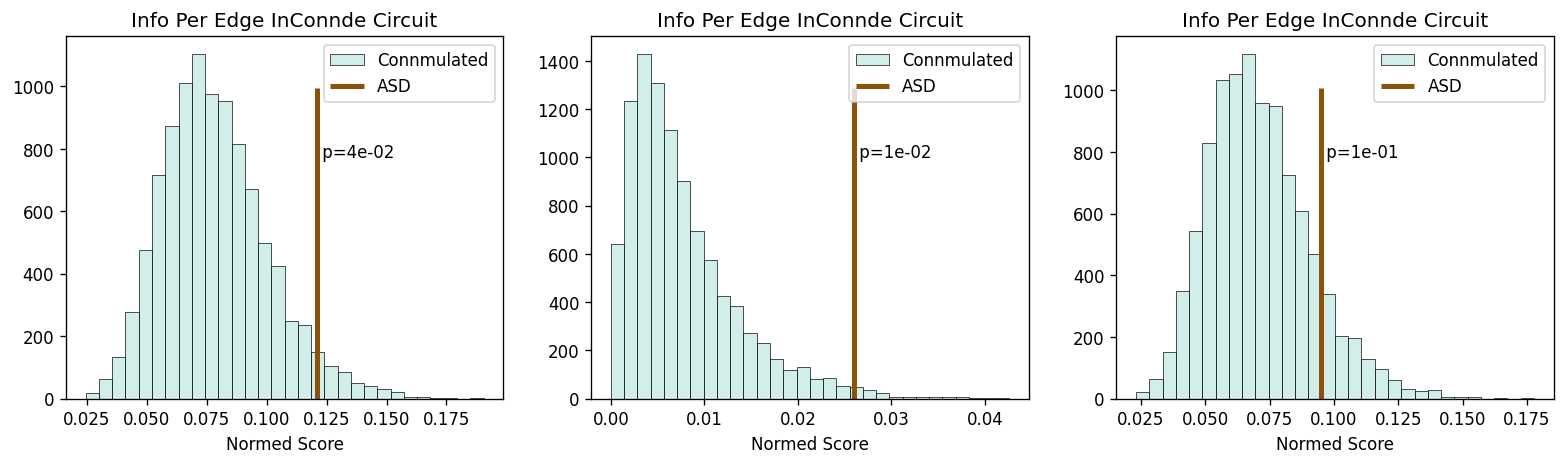

In [26]:
Connze = 46
idx = np.where(topNs==Connze)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(Cont_Conn[:, idx], (ASD_Conn)[idx], ax1,
                     title="Info Per Edge InConnde Circuit".format(), xlabel="Normed Score", 
                     dist_label="Connmulated", bar_label="ASD")
PlotPermutationP(Cont_Conn_Long[:, idx], (ASD_Conn_Long)[idx], ax2,
                     title="Info Per Edge InConnde Circuit".format(), xlabel="Normed Score", 
                     dist_label="Connmulated", bar_label="ASD")
PlotPermutationP(Cont_Conn_Short[:, idx], (ASD_Conn_Short)[idx], ax3,
                     title="Info Per Edge InConnde Circuit".format(), xlabel="Normed Score", 
                     dist_label="Connmulated", bar_label="ASD")

In [69]:
topNs = np.arange(200, 5, -1)
ASD_DistanceShort = np.load("../dat/Unionize_bias/RankScore2/RankScore.DistanceShort.mutsim.ASD.S1.npy")
Cont_DistanceShort = np.load("../dat/Unionize_bias/RankScore2/RankScore.DistanceShort.mutsim.Cont.S1.npy")
Sib_DistanceShort = PlotXXX(SibDF, topNs, adj_mat=adj_mat, ProbMat1=ProbMat1_short, ProbMat2=ProbMat2_short)

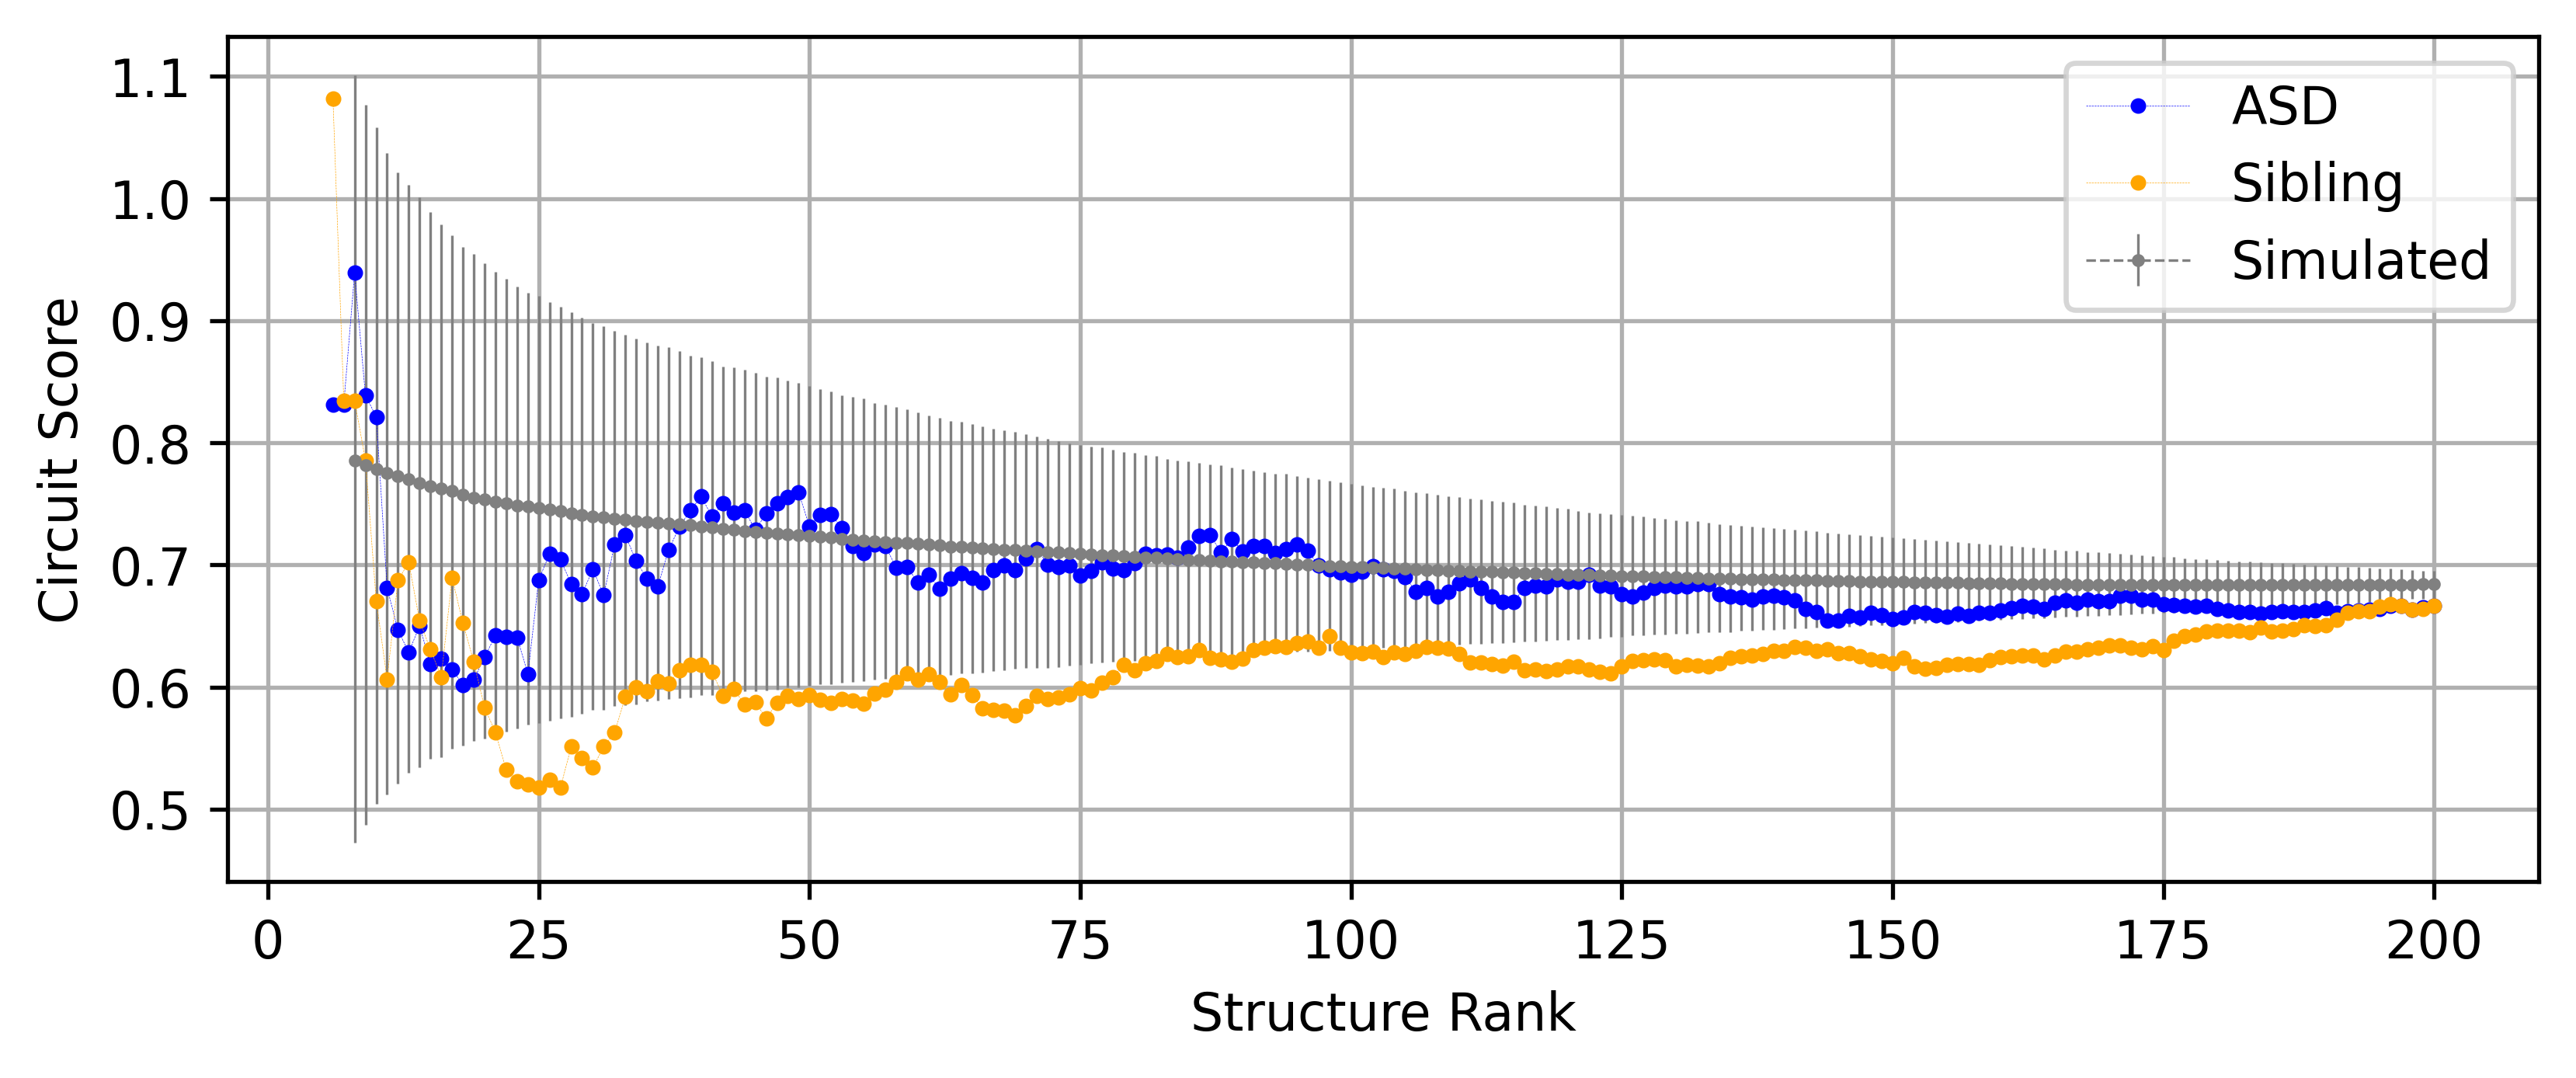

In [79]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))

cont = Cont_DistanceShort.mean(axis=0)
#cont = np.median(Cont_DistanceShort, axis=0)
ax.plot(topNs, ASD_DistanceShort, color="blue", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="ASD")
ax.plot(topNs, Sib_DistanceShort, color="orange", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="Sibling")


#lower = np.percentile(Cont_Distance, 2.5, axis=0)
#upper = np.percentile(Cont_Distance, 97.5, axis=0)
lower = np.percentile(Cont_DistanceShort, 50-34.1, axis=0)
upper = np.percentile(Cont_DistanceShort, 50+34.1, axis=0)
ax.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="Simulated")

#ax.set_title("Connection Info")
ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
#ax.set_ylim((0.2, 0.9))
plt.legend()

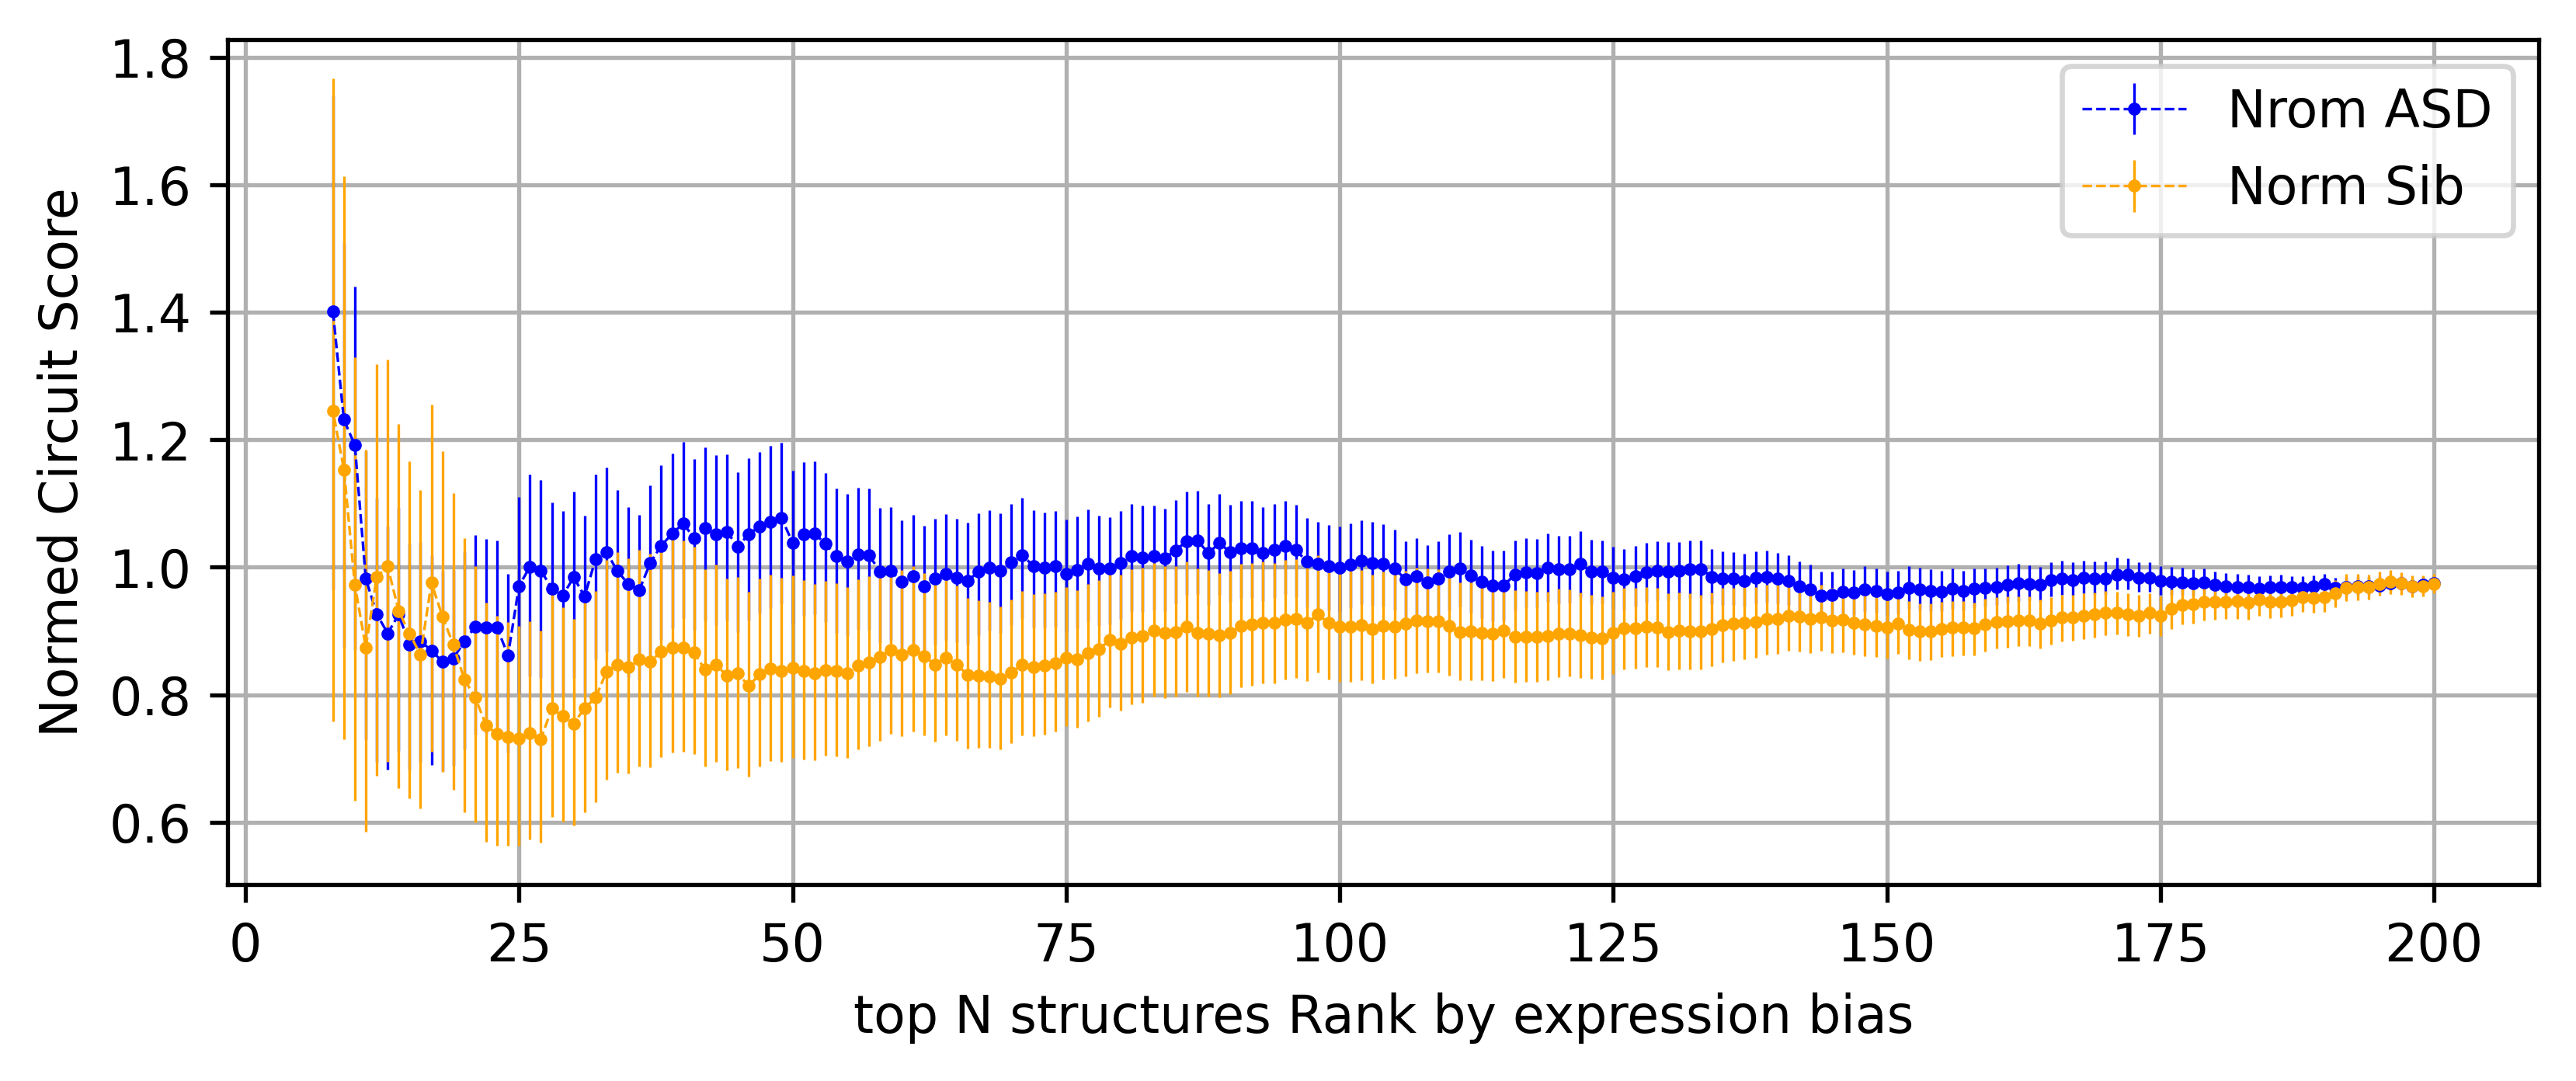

In [47]:
# Plot

Norm_ASD = ASD_DistanceShort/Cont_DistanceShort
Norm_Sib = Sib_DistanceShort/Cont_DistanceShort

fig, ax = plt.subplots(dpi=480, figsize=(8,3))

mean = np.mean(Norm_ASD, axis=0)
lower = np.percentile(Norm_ASD, 25, axis=0)
upper = np.percentile(Norm_ASD, 75, axis=0)
ax.errorbar(topNs, mean, color="blue", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Nrom ASD")


mean = np.mean(Norm_Sib, axis=0)
lower = np.percentile(Norm_Sib, 50-34.1, axis=0)
upper = np.percentile(Norm_Sib, 50 + 34.1, axis=0)
ax.errorbar(topNs, mean, color="orange", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Norm Sib")

#ax.set_title("Connection Info")
ax.grid(True)
ax.set_xlabel("top N structures Rank by expression bias")
ax.set_ylabel("Normed Circuit Score")
plt.legend()
#pdf.savefig( fig )

In [73]:
topNs = np.arange(200, 5, -1)
ASD_DistanceLong = np.load("../dat/Unionize_bias/RankScore2/RankScore.DistanceLong.mutsim.ASD.S1.npy")
Cont_DistanceLong = np.load("../dat/Unionize_bias/RankScore2/RankScore.DistanceLong.mutsim.Cont.S1.npy")
Sib_DistanceLong = PlotXXX(SibDF, topNs, adj_mat=adj_mat, ProbMat1=ProbMat1_long, ProbMat2=ProbMat2_long)

In [74]:
Cont_DistanceLong

array([[0.31189905, 0.30908526, 0.30905294, ..., 0.14052821, 0.14052821,
        0.14052821],
       [0.32218084, 0.32382276, 0.32450845, ..., 0.36869796, 0.43456712,
        0.08216159],
       [0.31816283, 0.31565317, 0.31675005, ..., 0.33998461, 0.27160377,
        0.31041091],
       ...,
       [0.31867431, 0.31702004, 0.31525108, ..., 0.99684927, 1.21338235,
        0.77274107],
       [0.30821426, 0.30813235, 0.30900022, ..., 0.1644907 , 0.18187501,
        0.21037013],
       [0.32599517, 0.32805502, 0.3297324 , ..., 0.59227384, 0.66733073,
        0.48664739]])

In [75]:
cont_xx = Cont_DistanceLong[~np.isnan(Cont_DistanceLong).any(axis=1), :]

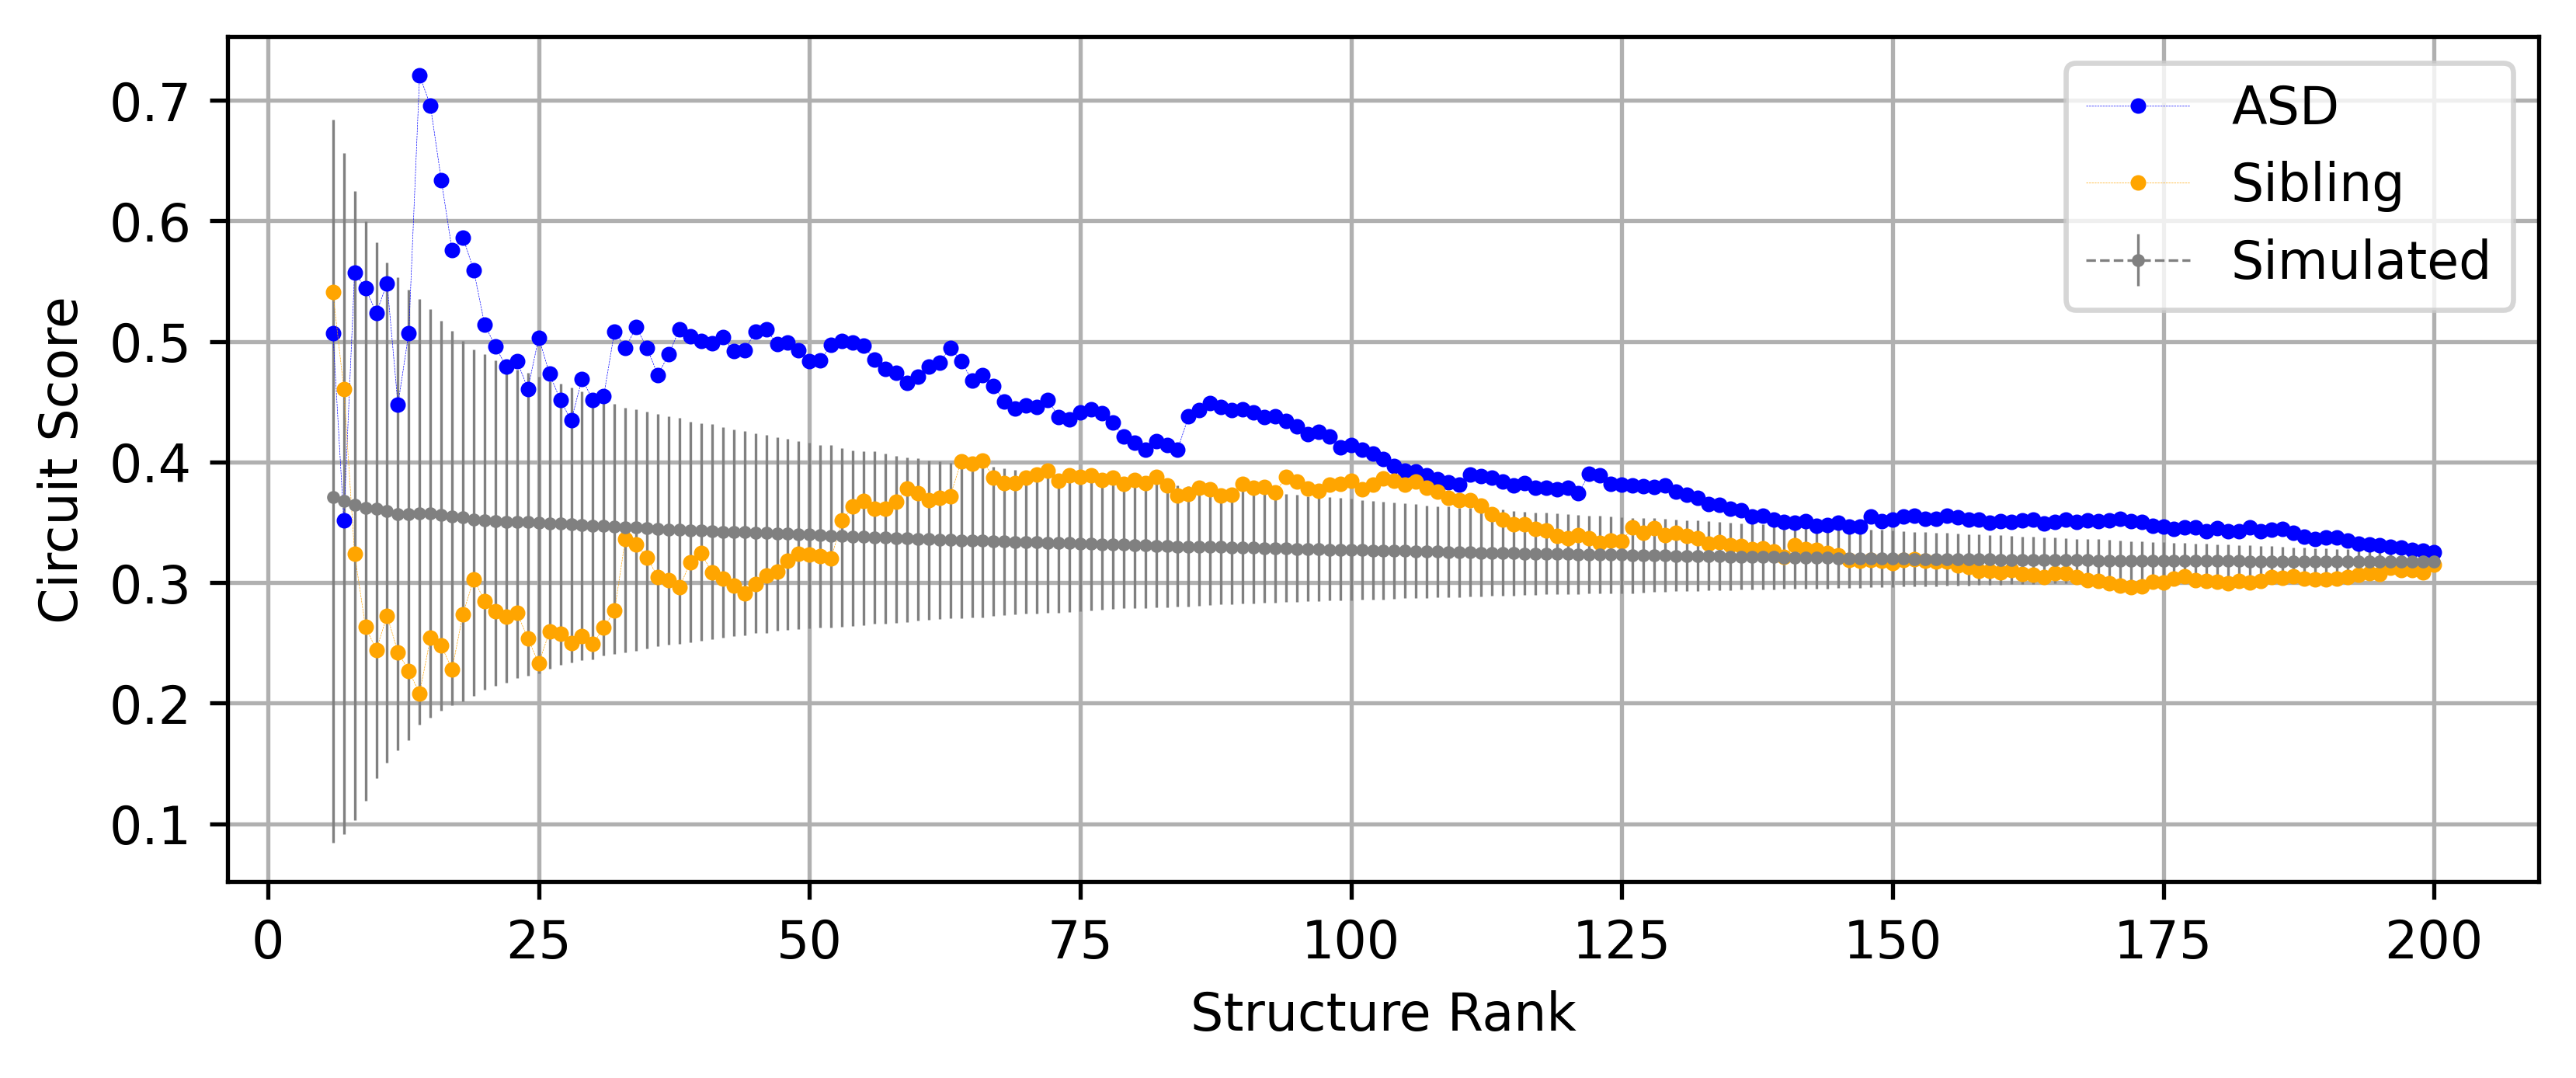

In [80]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))

#cont = Cont_DistanceLong.nanmean(axis=0)
cont = np.nanmean(Cont_DistanceLong, axis=0)
ax.plot(topNs, ASD_DistanceLong, color="blue", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="ASD")
ax.plot(topNs, Sib_DistanceLong, color="orange", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="Sibling")


#lower = np.percentile(Cont_Distance, 2.5, axis=0)
#upper = np.percentile(Cont_Distance, 97.5, axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="Simulated")

#ax.set_title("Connection Info")
ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
#ax.set_ylim((0.2, 0.9))
plt.legend()

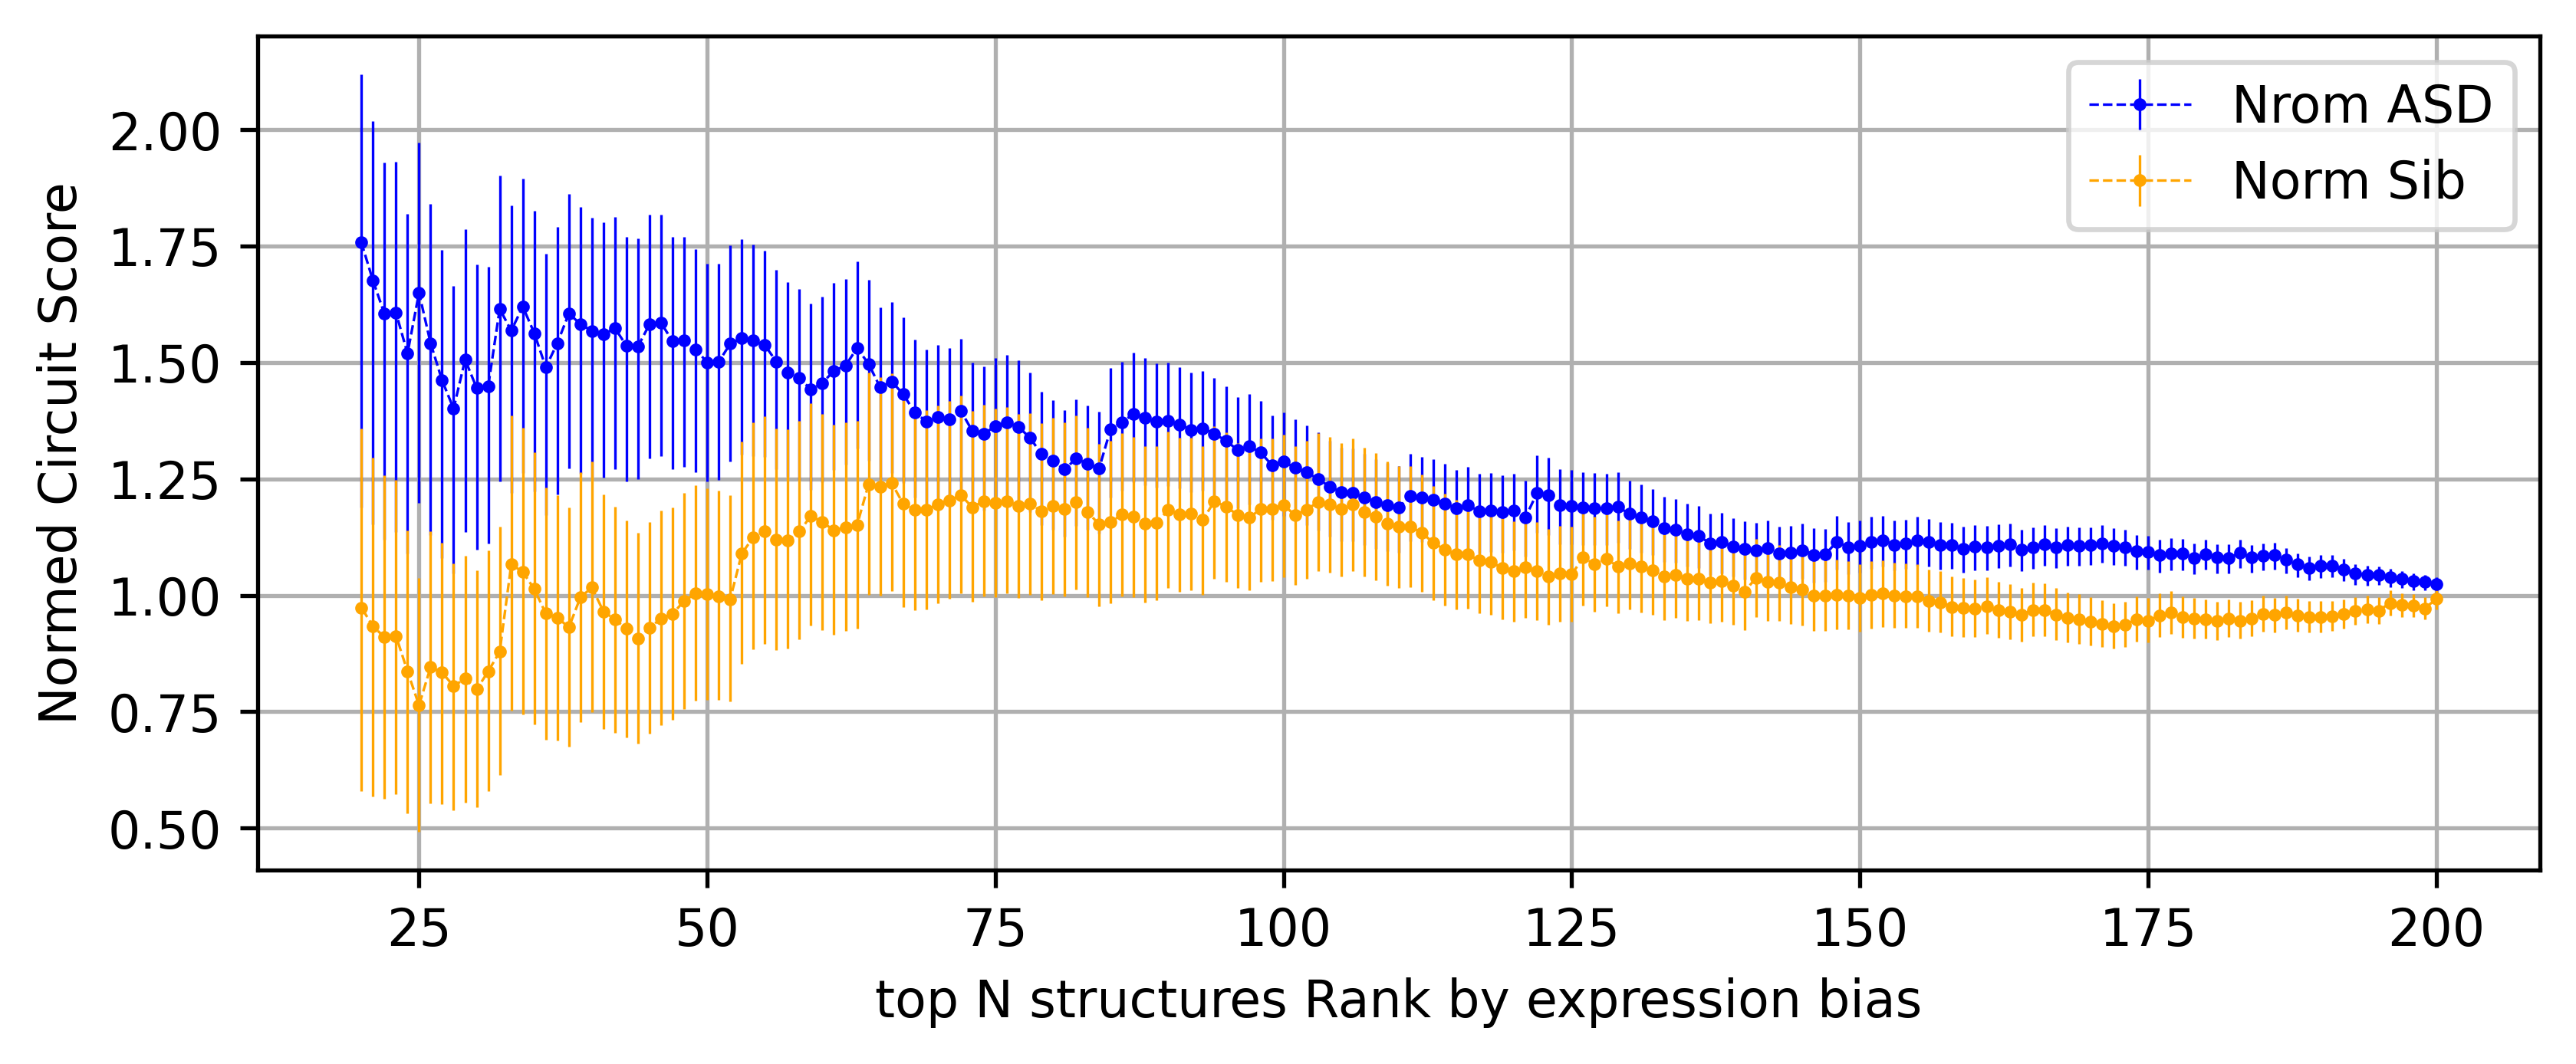

In [49]:
# Plot

Norm_ASD = ASD_DistanceLong/Cont_DistanceLong
Norm_Sib = Sib_DistanceLong/Cont_DistanceLong

fig, ax = plt.subplots(dpi=480, figsize=(8,3))

mean = np.mean(Norm_ASD, axis=0)
lower = np.percentile(Norm_ASD, 25, axis=0)
upper = np.percentile(Norm_ASD, 75, axis=0)
ax.errorbar(topNs, mean, color="blue", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Nrom ASD")


mean = np.mean(Norm_Sib, axis=0)
lower = np.percentile(Norm_Sib, 50-34.1, axis=0)
upper = np.percentile(Norm_Sib, 50 + 34.1, axis=0)
ax.errorbar(topNs, mean, color="orange", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Norm Sib")

#ax.set_title("Connection Info")
ax.grid(True)
ax.set_xlabel("top N structures Rank by expression bias")
ax.set_ylabel("Normed Circuit Score")
plt.legend()
#pdf.savefig( fig )

Text(0, 0.5, '-log10(P)')

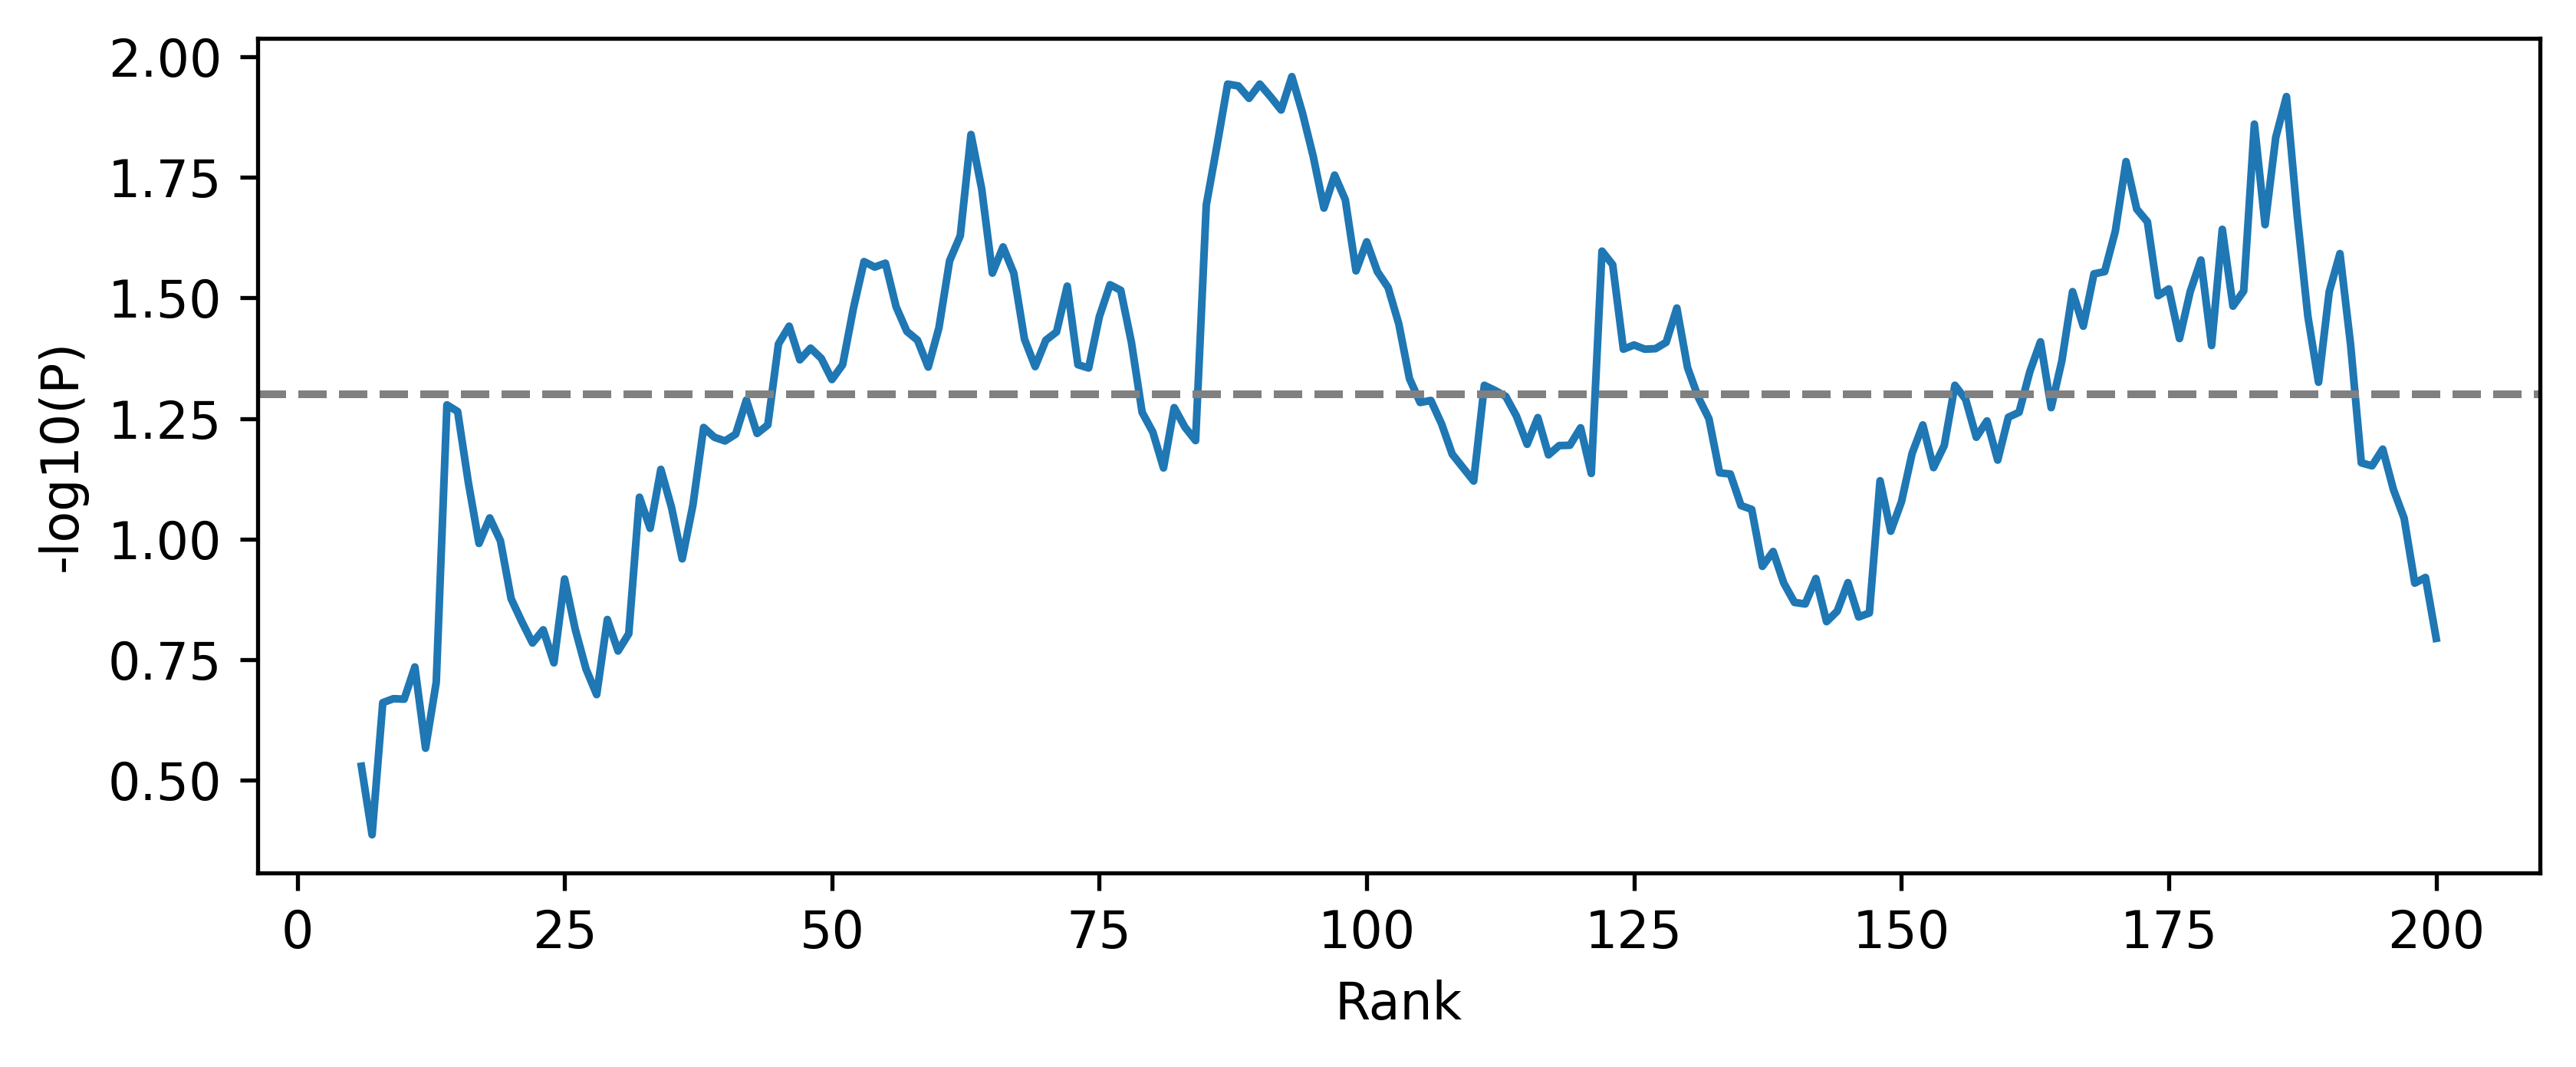

In [20]:
Zscores, Pvalues = Plot_LogP(ASD_DistanceLong, Cont_DistanceLong.transpose())
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
ax.plot(topNs, -np.log10(Pvalues))
ax.axhline(y=1.3, color='grey', linestyle='--')
ax.set_xlabel("Rank")
ax.set_ylabel("-log10(P)")

<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

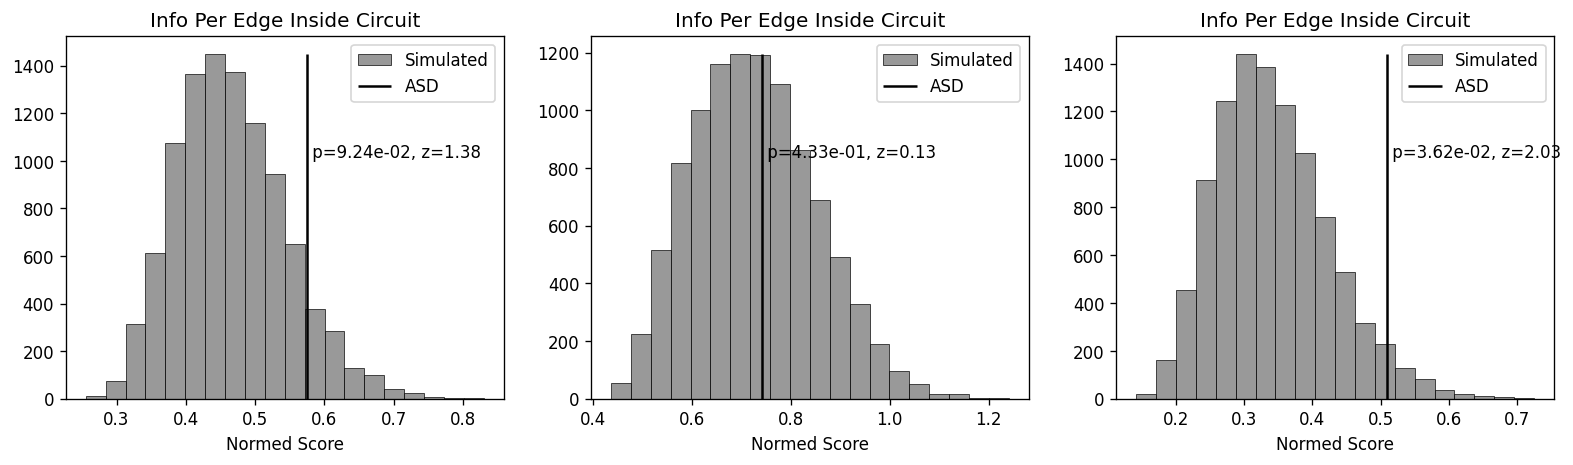

In [81]:
size = 46
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(Cont_Distance[:, idx], (ASD_Distance)[idx], ax1,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Simulated", bar_label="ASD")
PlotPermutationP(Cont_DistanceShort[:, idx], (ASD_DistanceShort)[idx], ax2,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Simulated", bar_label="ASD")
PlotPermutationP(Cont_DistanceLong[:, idx], (ASD_DistanceLong)[idx], ax3,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Simulated", bar_label="ASD")
#pdf.savefig( fig )
#pdf.close()

<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

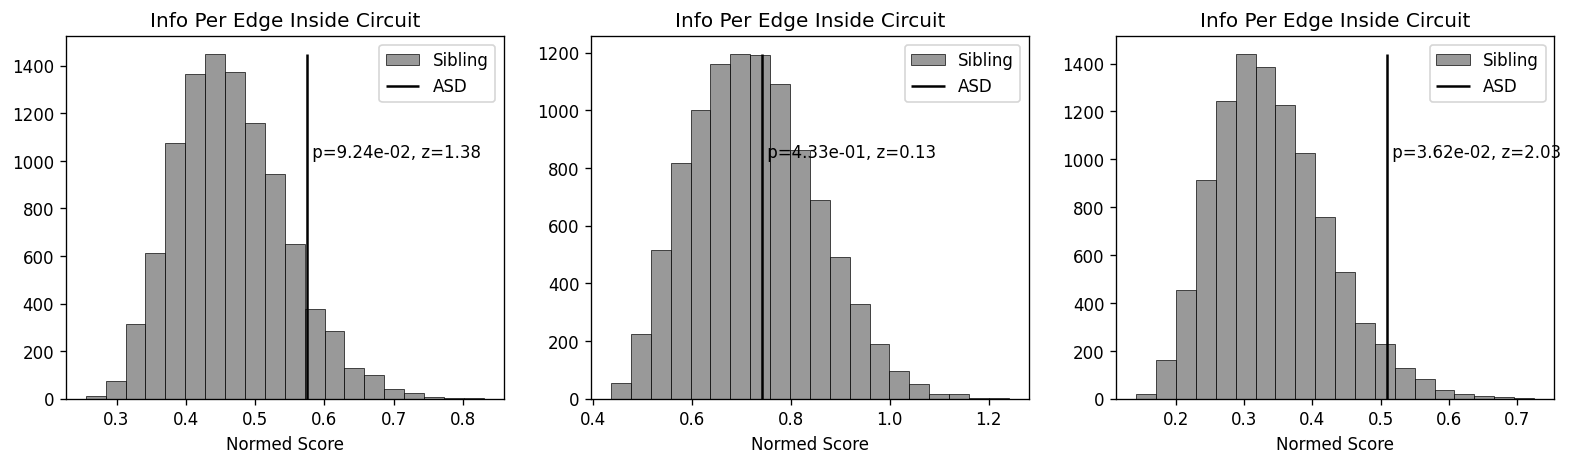

In [97]:
size = 46
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(Cont_Distance[:, idx], (ASD_Distance)[idx], ax1,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(Cont_DistanceShort[:, idx], (ASD_DistanceShort)[idx], ax2,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(Cont_DistanceLong[:, idx], (ASD_DistanceLong)[idx], ax3,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
#pdf.savefig( fig )
#pdf.close()

In [99]:
print(ASD_Distance[idx], ASD_DistanceShort[idx], ASD_DistanceLong[idx])

0.5746725449959333 0.7420905709888445 0.5101258361793893


<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

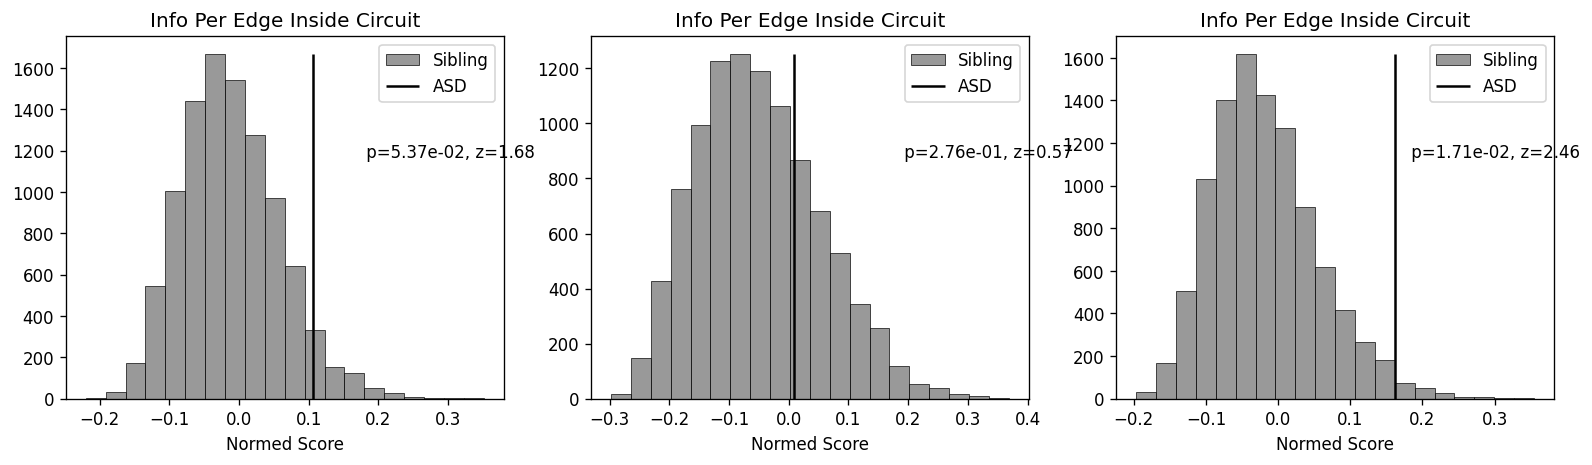

In [45]:
size = 53
idx = np.where(topNs==size)[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=120, figsize=(16,4))
PlotPermutationP(Norm_Sib_Distance[:, idx], (Norm_ASD)[idx], ax1,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(Norm_Sib_DistanceShort[:, idx], (Norm_ASD_Short)[idx], ax2,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(Norm_Sib_DistanceLong[:, idx], (Norm_ASD_Long)[idx], ax3,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
#pdf.savefig( fig )
#pdf.close()

### Half&Half

In [11]:
# have to deal with 0 in prob mat
def ScoreCircuit_halfhalf(STRs, adj_mat, dist_mat, ProbMat1, ProbMat2):
    adj_mat_cir = adj_mat.loc[STRs, STRs]
    dist_mat_cir = dist_mat.loc[STRs, STRs]
    Cir_ProbMat1 = ProbMat1.loc[STRs, STRs] # P of have an edge
    Cir_ProbMat2 = ProbMat2.loc[STRs, STRs] # P of not have an edge
    
    Cartesian_distances_w_edge = MaskDistMat(adj_mat_cir, dist_mat_cir, cutoff=0)
    mid = np.median([x for x in Cartesian_distances_w_edge.values.flatten() if x > 0])
    long_dist_mat_cir = dist_mat_cir[dist_mat_cir >= mid]
    short_dist_mat_cir = dist_mat_cir[dist_mat_cir < mid]
    
    long_prob1_mat_cir = Cir_ProbMat1[long_dist_mat_cir>0]
    long_prob2_mat_cir = Cir_ProbMat2[long_dist_mat_cir>0]
    
    short_prob1_mat_cir = Cir_ProbMat1[short_dist_mat_cir>0]
    short_prob2_mat_cir = Cir_ProbMat2[short_dist_mat_cir>0]
    
    # Short distance score
    N_events_short = np.count_nonzero(short_prob1_mat_cir)
    Cir_ProbMat_wEdge_short = short_prob1_mat_cir[adj_mat_cir>0]
    Cir_ProbMat_woEdge_short = short_prob2_mat_cir[adj_mat_cir==0]
    Cir_ProbMat_wEdge_short[Cir_ProbMat_wEdge_short==0]=1
    Cir_ProbMat_woEdge_short[Cir_ProbMat_woEdge_short==0]=1
    Cir_Info_wEdge_short = -np.log2(Cir_ProbMat_wEdge_short)
    Cir_Info_woEdge_short = -np.log2(Cir_ProbMat_woEdge_short)
    Cir_Info_wEdge_short = np.nan_to_num(Cir_Info_wEdge_short, nan=0)
    Cir_Info_woEdge_short = np.nan_to_num(Cir_Info_woEdge_short, nan=0)
    score_short = (np.sum(Cir_Info_wEdge_short) + np.sum(Cir_Info_woEdge_short) )/N_events_short
    
    # Long distance score
    N_events_long = np.count_nonzero(long_prob1_mat_cir)
    Cir_ProbMat_wEdge_long = long_prob1_mat_cir[adj_mat_cir>0]
    Cir_ProbMat_woEdge_long = long_prob2_mat_cir[adj_mat_cir==0]
    Cir_ProbMat_wEdge_long[Cir_ProbMat_wEdge_long==0]=1
    Cir_ProbMat_woEdge_long[Cir_ProbMat_woEdge_long==0]=1
    Cir_Info_wEdge_long = -np.log2(Cir_ProbMat_wEdge_long)
    Cir_Info_woEdge_long = -np.log2(Cir_ProbMat_woEdge_long)
    Cir_Info_wEdge_long = np.nan_to_num(Cir_Info_wEdge_long, nan=0)
    Cir_Info_woEdge_long = np.nan_to_num(Cir_Info_woEdge_long, nan=0)
    score_long = (np.sum(Cir_Info_wEdge_long) + np.sum(Cir_Info_woEdge_long) )/N_events_long
    
    
    return score_short, score_long

In [16]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
Carteisn_Dist_Mat_All = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv", index_col=0)
InfoMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.Entropy.csv", index_col=0)
ProbMat1 = np.exp2(-InfoMat)
ProbMat1[ProbMat1==1] = 0
ProbMat2 = 1-ProbMat1

In [19]:
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
STR_Ranks = ASD_BiasDF.index.values
test_ns = np.arange(20, 200, 10)
asd_topN_Scores_short = []
asd_topN_Scores_long = []
for topN in test_ns:
    top_strs = STR_Ranks[:topN]
    asd_score_short, asd_score_long = ScoreCircuit_halfhalf(
        top_strs, adj_mat, Carteisn_Dist_Mat_All, ProbMat1, ProbMat2)
    asd_topN_Scores_short.append(asd_score_short)
    asd_topN_Scores_long.append(asd_score_long)
asd_topN_Scores_short = np.array(asd_topN_Scores_short)
asd_topN_Scores_long = np.array(asd_topN_Scores_long)

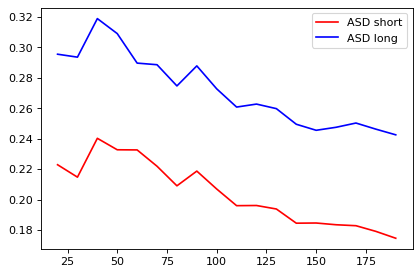

In [20]:
plt.plot(test_ns, asd_topN_Scores_short, color="red", label="ASD short")
plt.plot(test_ns, asd_topN_Scores_long, color="blue", label="ASD long")
plt.legend()

In [21]:
Ncont = 10
All_Cont_Scores_short = []
All_Cont_Scores_long = []
contDir = "../dat/Unionize_bias/SubSampleSib/"
for i, file in enumerate(os.listdir(contDir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    topN_cohe = []
    cont_topN_Scores_short = []
    cont_topN_Scores_long = []
    for topN in test_ns:
        top_strs = df.index.values[:topN]
        cont_score_short, cont_score_long = ScoreCircuit_halfhalf(top_strs, adj_mat, 
                            Carteisn_Dist_Mat_All, ProbMat1, ProbMat2)
        cont_topN_Scores_short.append(cont_score_short)
        cont_topN_Scores_long.append(cont_score_long)
    cont_topN_Scores_short = np.array(cont_topN_Scores_short)
    cont_topN_Scores_long = np.array(cont_topN_Scores_long)
    All_Cont_Scores_short.append(cont_topN_Scores_short)
    All_Cont_Scores_long.append(cont_topN_Scores_long)
    if i > Ncont:
        break
All_Cont_Scores_short = np.array(All_Cont_Scores_short)
All_Cont_Scores_long = np.array(All_Cont_Scores_long)

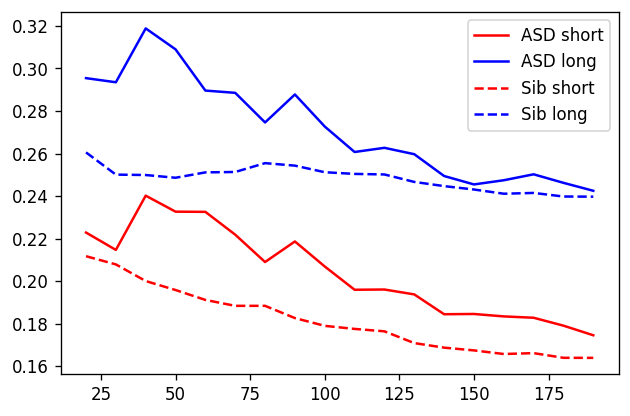

In [26]:
plt.figure(dpi=120)
plt.plot(test_ns, asd_topN_Scores_short, color="red", label="ASD short")
plt.plot(test_ns, asd_topN_Scores_long, color="blue", label="ASD long")
plt.plot(test_ns, All_Cont_Scores_short.mean(axis=0), color="red", ls='dashed', label="Sib short")
plt.plot(test_ns, All_Cont_Scores_long.mean(axis=0), color="blue", ls='dashed', label="Sib long")
plt.legend()

In [27]:
453/20

22.65

### Bias matched

In [59]:
InfoMat_long = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.long.csv", index_col=0)
ProbMat1_long = np.exp2(-InfoMat_long)
ProbMat1_long[ProbMat1_long==1] = 0
ProbMat2_long = 1-ProbMat1_long

InfoMat_short = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.short.csv", index_col=0)
ProbMat1_short = np.exp2(-InfoMat_short)
ProbMat1_short[ProbMat1_short==1] = 0
ProbMat2_short = 1-ProbMat1_short

In [61]:
Ncont = 100
All_Cont_Scores = []
All_Cont_Scores_short = []
All_Cont_Scores_long = []
contDir = "../dat/Unionize_bias/SubSampleSib_biaslim/"
for i, file in enumerate(os.listdir(contDir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    topN_cohe = []
    cont_topN_Scores = []
    cont_topN_Scores_short = []
    cont_topN_Scores_long = []
    for topN in test_ns:
        top_strs = df.index.values[:topN]
        cont_score = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
        cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
        cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
        cont_topN_Scores.append(cont_score)
        cont_topN_Scores_short.append(cont_score_short)
        cont_topN_Scores_long.append(cont_score_long)
    cont_topN_Scores = np.array(cont_topN_Scores)
    cont_topN_Scores_short = np.array(cont_topN_Scores_short)
    cont_topN_Scores_long = np.array(cont_topN_Scores_long)
    All_Cont_Scores.append(cont_topN_Scores)
    All_Cont_Scores_short.append(cont_topN_Scores_short)
    All_Cont_Scores_long.append(cont_topN_Scores_long)
    if i > Ncont:
        break
All_Cont_Scores = np.array(All_Cont_Scores)
All_Cont_Scores_short = np.array(All_Cont_Scores_short)
All_Cont_Scores_long = np.array(All_Cont_Scores_long)

/home/jw3514/Work/ASD_Circuits/src/ASD_Circuits.py:2645: RuntimeWarning: invalid value encountered in double_scalars
  return score / N_events


In [ ]:
plt.figure(dpi=120)
plt.plot(test_ns, asd_topN_Scores_short, color="red", label="ASD short")
plt.plot(test_ns, asd_topN_Scores_long, color="blue", label="ASD long")
plt.plot(test_ns, All_Cont_Scores_short.mean(axis=0), color="red", ls='dashed', label="Sib short")
plt.plot(test_ns, All_Cont_Scores_long.mean(axis=0), color="blue", ls='dashed', label="Sib long")
plt.legend()

In [96]:
topN = 46

Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib_biaslim/"

topN_bias = []
cont_topN_Scores = []
cont_topN_Scores_short = []
cont_topN_Scores_long = []
    
fout = open(contDir + "cpfile.sh", 'wt')

for i, file in enumerate(os.listdir(contDir)):
    #print(file)
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    bias = df.loc[top_strs, "EFFECT"].mean()
    
    if bias > 0.38:           
        fout.write("cp {} xx/".format(file) + "\n")
        
        topN_bias.append(bias)
        cont_score = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
        cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
        cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
        cont_topN_Scores.append(cont_score)
        cont_topN_Scores_short.append(cont_score_short)
        cont_topN_Scores_long.append(cont_score_long)
        #if cont_score_long > 0.65:
        #    print(RegionDistributionsList(top_strs))
    #if i > Ncont:
    #    break
fout.close()
print(len(cont_topN_Scores))

1412


In [80]:
np.mean(topN_bias)

0.39720210125891614

In [ ]:
0.5746725449959333 0.7420905709888445 0.5101258361793893

<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

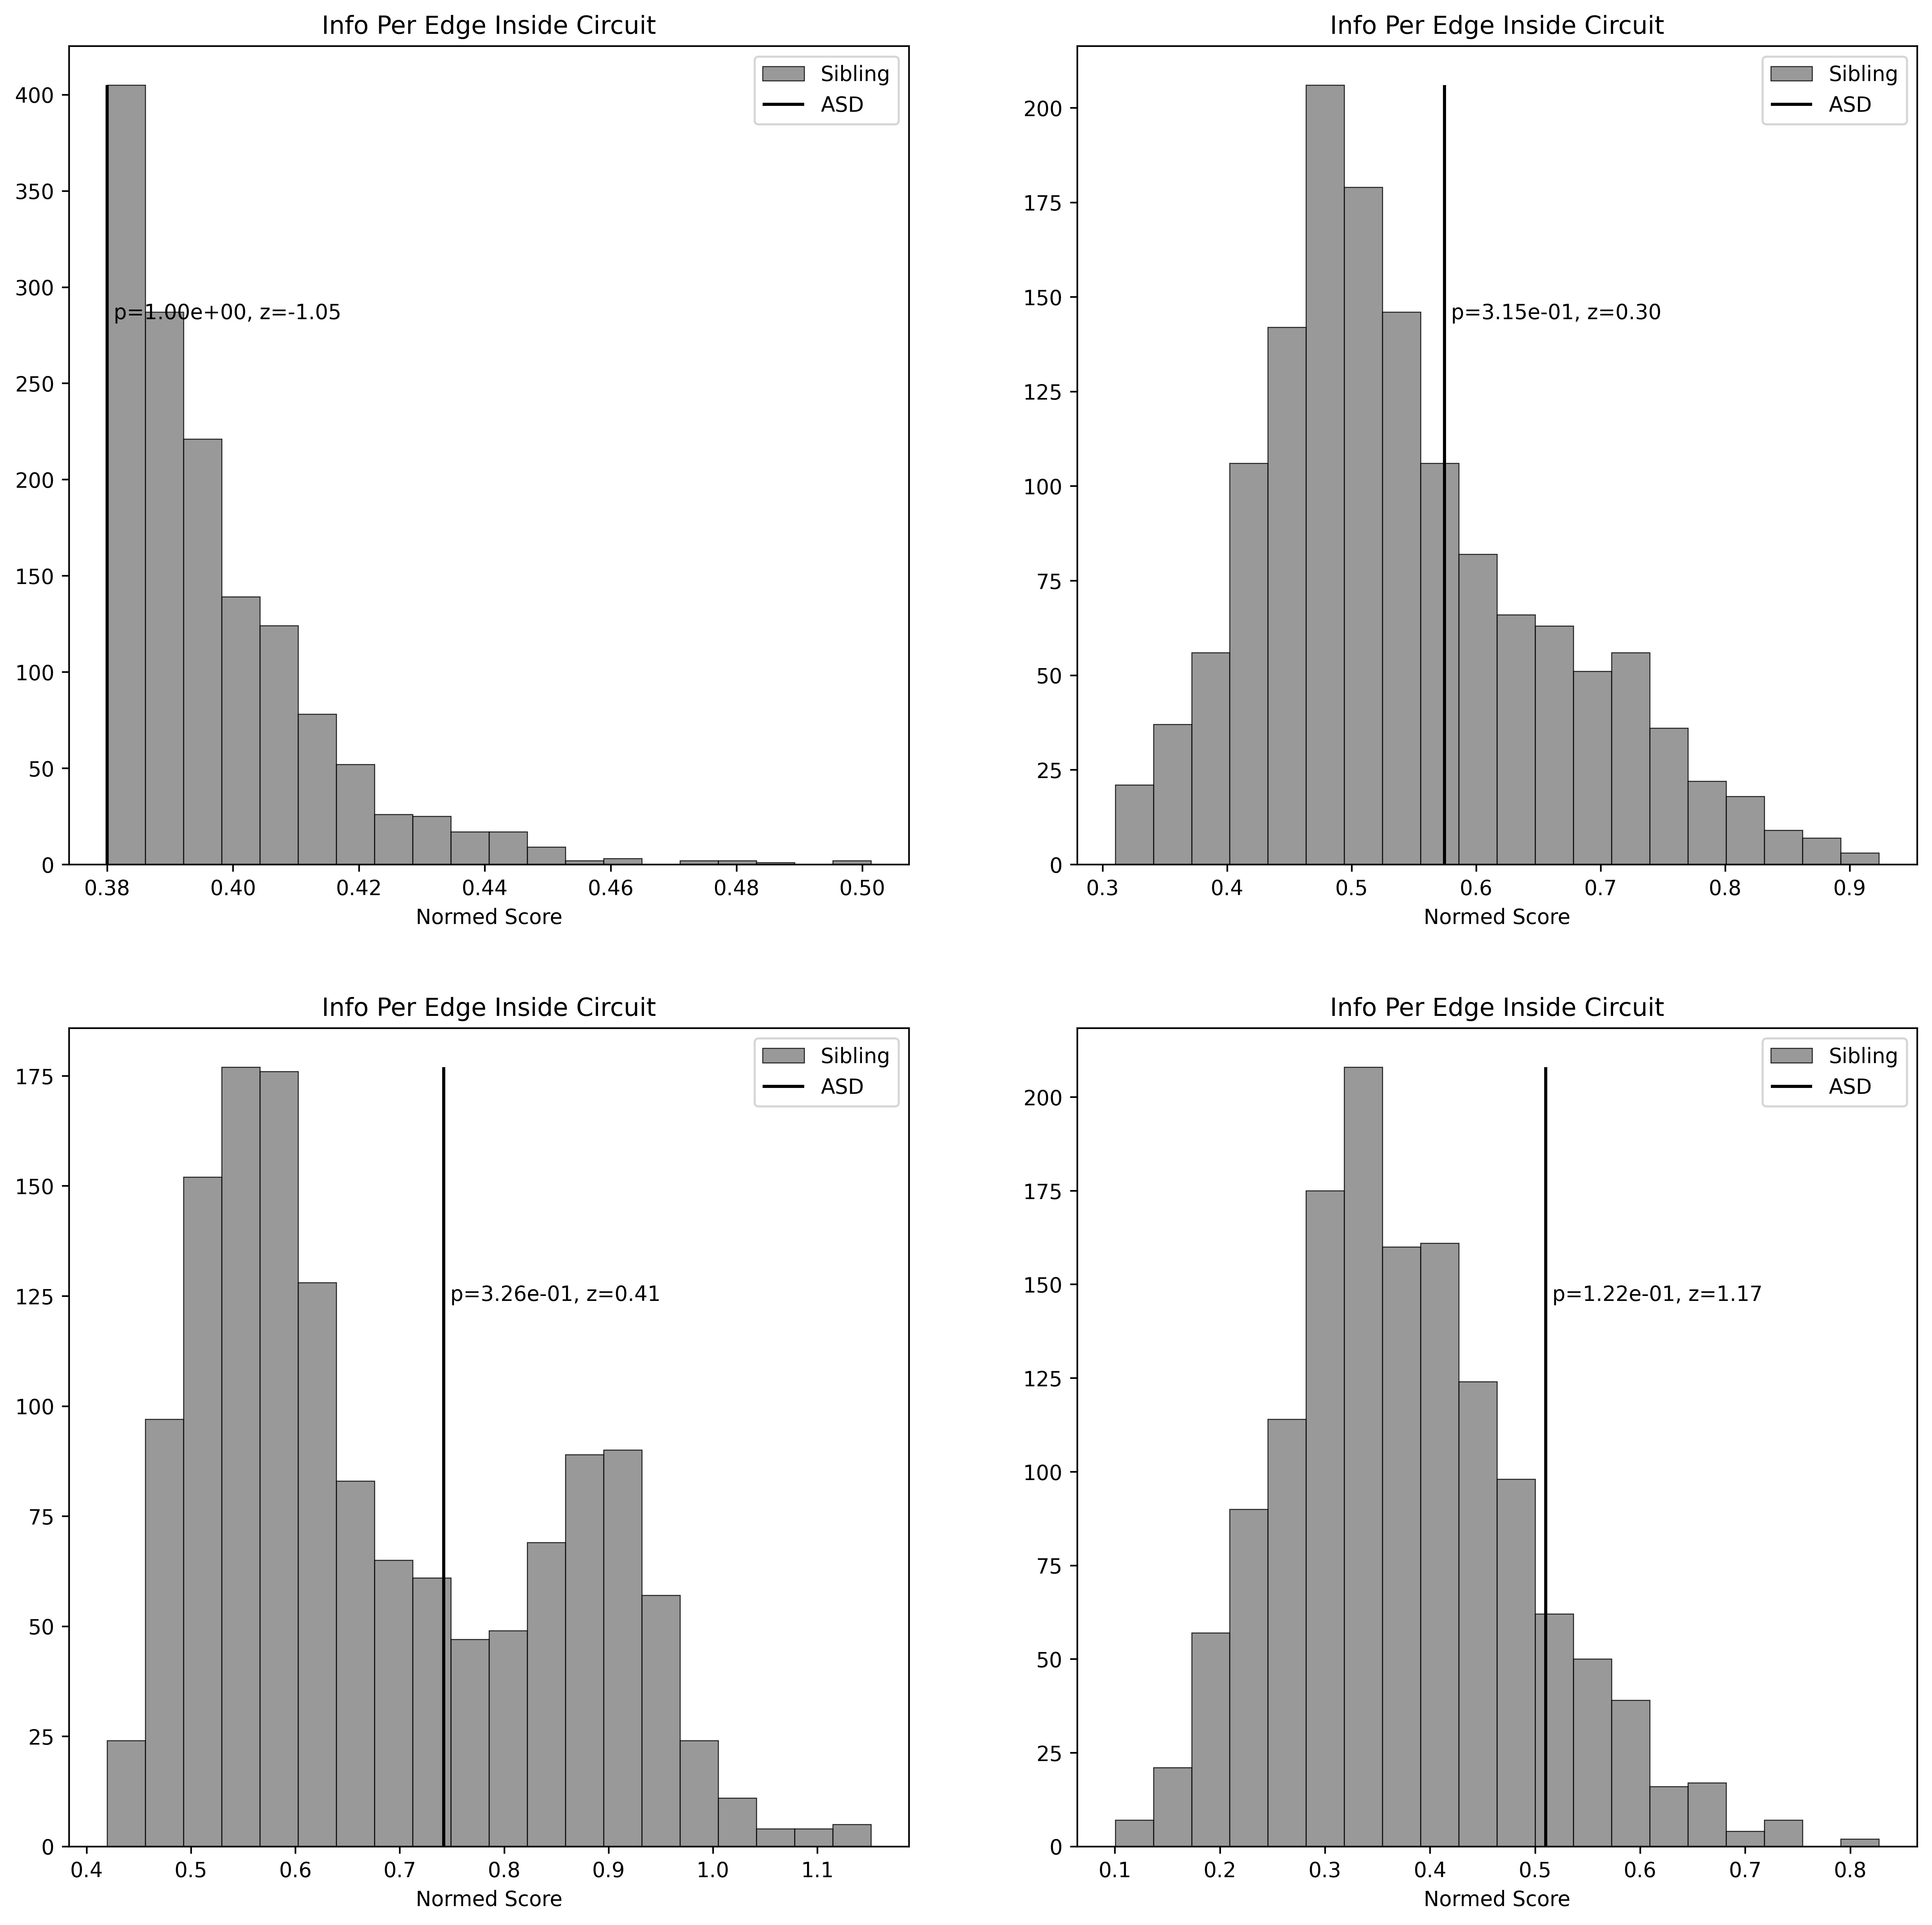

In [100]:
Score_ASD = 0.5746725449959333
Score_ASD_Short = 0.7420905709888445 #0.817 0.673
Score_ASD_Long = 0.5101258361793893
fig, axs = plt.subplots(2,2,dpi=480, figsize=(16,16))
PlotPermutationP(topN_bias, 0.38, axs[0][0],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores, Score_ASD, axs[0][1],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores_short, Score_ASD_Short, axs[1][0],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores_long, Score_ASD_Long, axs[1][1],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [83]:
print(np.std(cont_topN_Scores))

0.11440218661285895


In [84]:
size = 46
print(np.std(Cont_Distance[:, idx]))

0.07896950360689457


### InfoScore Matched

In [163]:
topN = 46

Ncont = 500
contDir = "../dat/Unionize_bias/SubSampleSib_scorelim/"

topN_bias_lv2 = []
cont_topN_Scores_lv2 = []
cont_topN_Scores_short_lv2 = []
cont_topN_Scores_long_lv2 = []

cc = 0
for i, file in enumerate(os.listdir(contDir)):
    #print(file)
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    bias = df.loc[top_strs, "EFFECT"].mean()       
        
    topN_bias_lv2.append(bias)
    cont_score = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
    cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores_lv2.append(cont_score)
    cont_topN_Scores_short_lv2.append(cont_score_short)
    cont_topN_Scores_long_lv2.append(cont_score_long)
    cc += 1
    if cc>Ncont:
        break

print(len(cont_topN_Scores_lv2))

501


In [165]:
topN = 46

Ncont = 500
contDir = "../dat/Unionize_bias/SubSampleSib_scorelim2/"

topN_bias_lv1 = []
cont_topN_Scores_lv1 = []
cont_topN_Scores_short_lv1 = []
cont_topN_Scores_long_lv1 = []

cc = 0
for i, file in enumerate(os.listdir(contDir)):
    #print(file)
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    bias = df.loc[top_strs, "EFFECT"].mean()       
        
    topN_bias_lv1.append(bias)
    cont_score = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
    cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores_lv1.append(cont_score)
    cont_topN_Scores_short_lv1.append(cont_score_short)
    cont_topN_Scores_long_lv1.append(cont_score_long)
    cc += 1
    if cc>Ncont:
        break

print(len(cont_topN_Scores_lv1))

501


<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

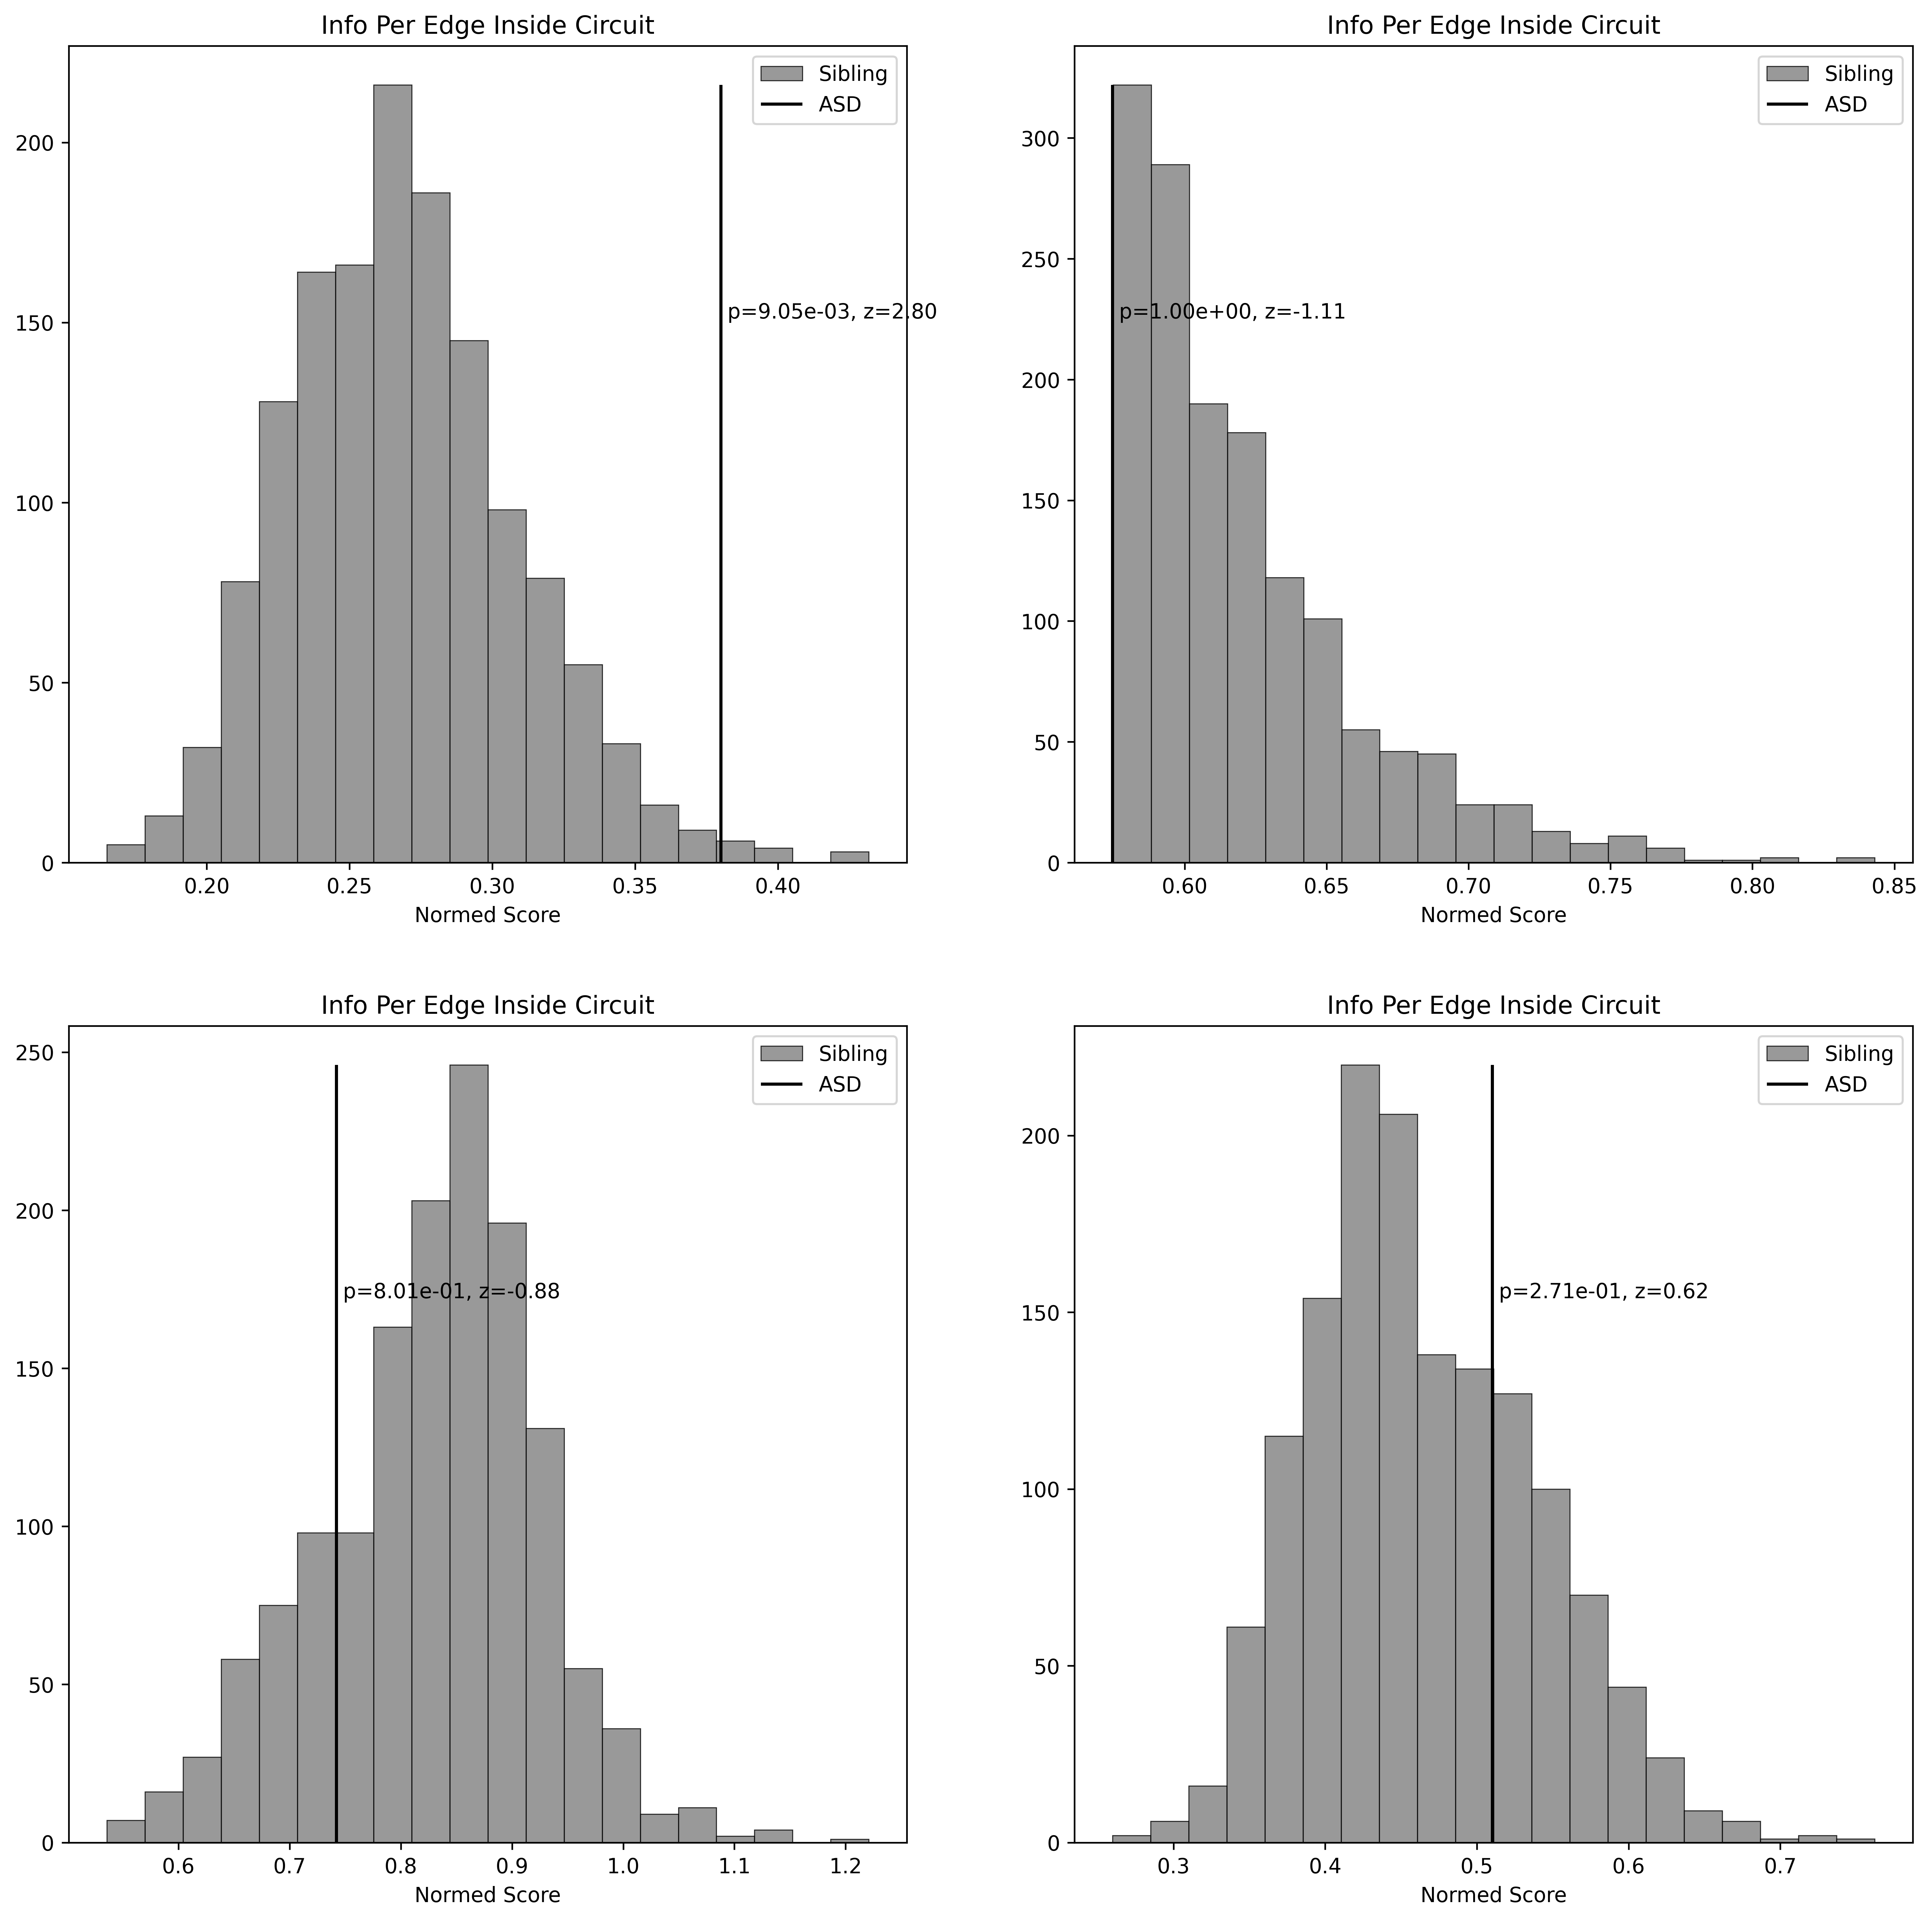

In [159]:
Score_ASD = 0.5746725449959333
Score_ASD_Short = 0.7420905709888445 #0.817 0.673
Score_ASD_Long = 0.5101258361793893
fig, axs = plt.subplots(2,2,dpi=480, figsize=(16,16))
PlotPermutationP(topN_bias, 0.38, axs[0][0],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores, Score_ASD, axs[0][1],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores_short, Score_ASD_Short, axs[1][0],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores_long, Score_ASD_Long, axs[1][1],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [166]:
topN = 46

Ncont = 500
contDir = "../dat/Unionize_bias/SubSampleSib/"

topN_bias_normal = []
cont_topN_Scores_normal = []
cont_topN_Scores_short_normal = []
cont_topN_Scores_long_normal = []

cc = 0
for i, file in enumerate(os.listdir(contDir)):
    #print(file)
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    bias = df.loc[top_strs, "EFFECT"].mean()       
        
    topN_bias_normal.append(bias)
    cont_score = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
    cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores_normal.append(cont_score)
    cont_topN_Scores_short_normal.append(cont_score_short)
    cont_topN_Scores_long_normal.append(cont_score_long)
    cc += 1
    if cc > Ncont:
        break

print(len(cont_topN_Scores_normal))

501


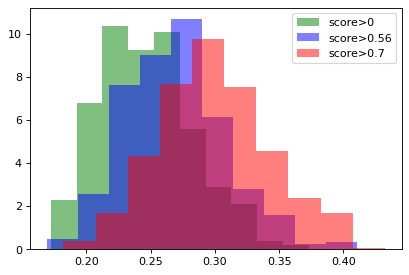

In [169]:
plt.hist(topN_bias_normal, color="green", density=1, alpha=0.5, label="score>0")
plt.hist(topN_bias_lv1, color="blue", density=1, alpha=0.5, label="score>0.56")
plt.hist(topN_bias_lv2, color="red", density=1, alpha=0.5, label="score>0.7")
plt.legend()